## Necessary imports

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

## Text preparing

In [2]:
def prepare_text(text):
    terminal = text[-1]
    if text[:-1].find(terminal) != -1:
        chars = set(text)
        for i in range(33, 128):
            if i not in chars:
                return text + chr(i)
    else:
        return text

# Text examples

In [3]:
ex1 = prepare_text("bbb$")
ex2 = prepare_text("aabbabd")
ex3 = prepare_text("ababcd")
ex4 = prepare_text("abcbccd")
ex5 = prepare_text(open("1997_714.txt", 'r', encoding="utf8").read())

# Trie building

In [4]:
class Node:
    def __init__(self, letter):
        self.parent = None
        self.letter = letter
        self.children = {}
        self.index = None
    def slow_find(self,label):
        child = self.child_by_first_letter(label[0])
        if not child:
            return self 
        for i in range(1,child.length()):
            if child.letter(i) != label[i]:
                return self.break_path(label[:i])
                return child.slow_find(label[child.length():])  

In [5]:
def trie(text):
    root = Node(None)
    for start in range(len(text)):
        curr_node = root
        for l in text[start:]:
            if l not in curr_node.children:
                curr_node.children[l] = Node(l)
                curr_node.children[l].parent = curr_node
            curr_node = curr_node.children[l]
    return root

### Trie visualisation

In [6]:
def dfs(node, G, index = 0):
    node.index = index
    if node.parent is not None:
        G.add_edge(node.parent.index, index, L=node.letter)
    index += 1
    for v in node.children.values():
        index = dfs(v, G, index)
    return index

def draw_trie(trie_root, filename = None):
    plt.figure(figsize=(30,40))
    G = nx.DiGraph()
    dfs(trie_root, G)
    
    pos = graphviz_layout(G, prog='dot')
        
    edge_labels = {(u,v): d['L'] for u,v,d in G.edges(data=True)} 
    
    nx.draw_networkx_edges(G, pos, with_labels=False, arrows=True)   
    nx.draw_networkx_edge_labels(G, pos, font_size=30, edge_labels=edge_labels)
    
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

/home/pinio/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/pinio/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


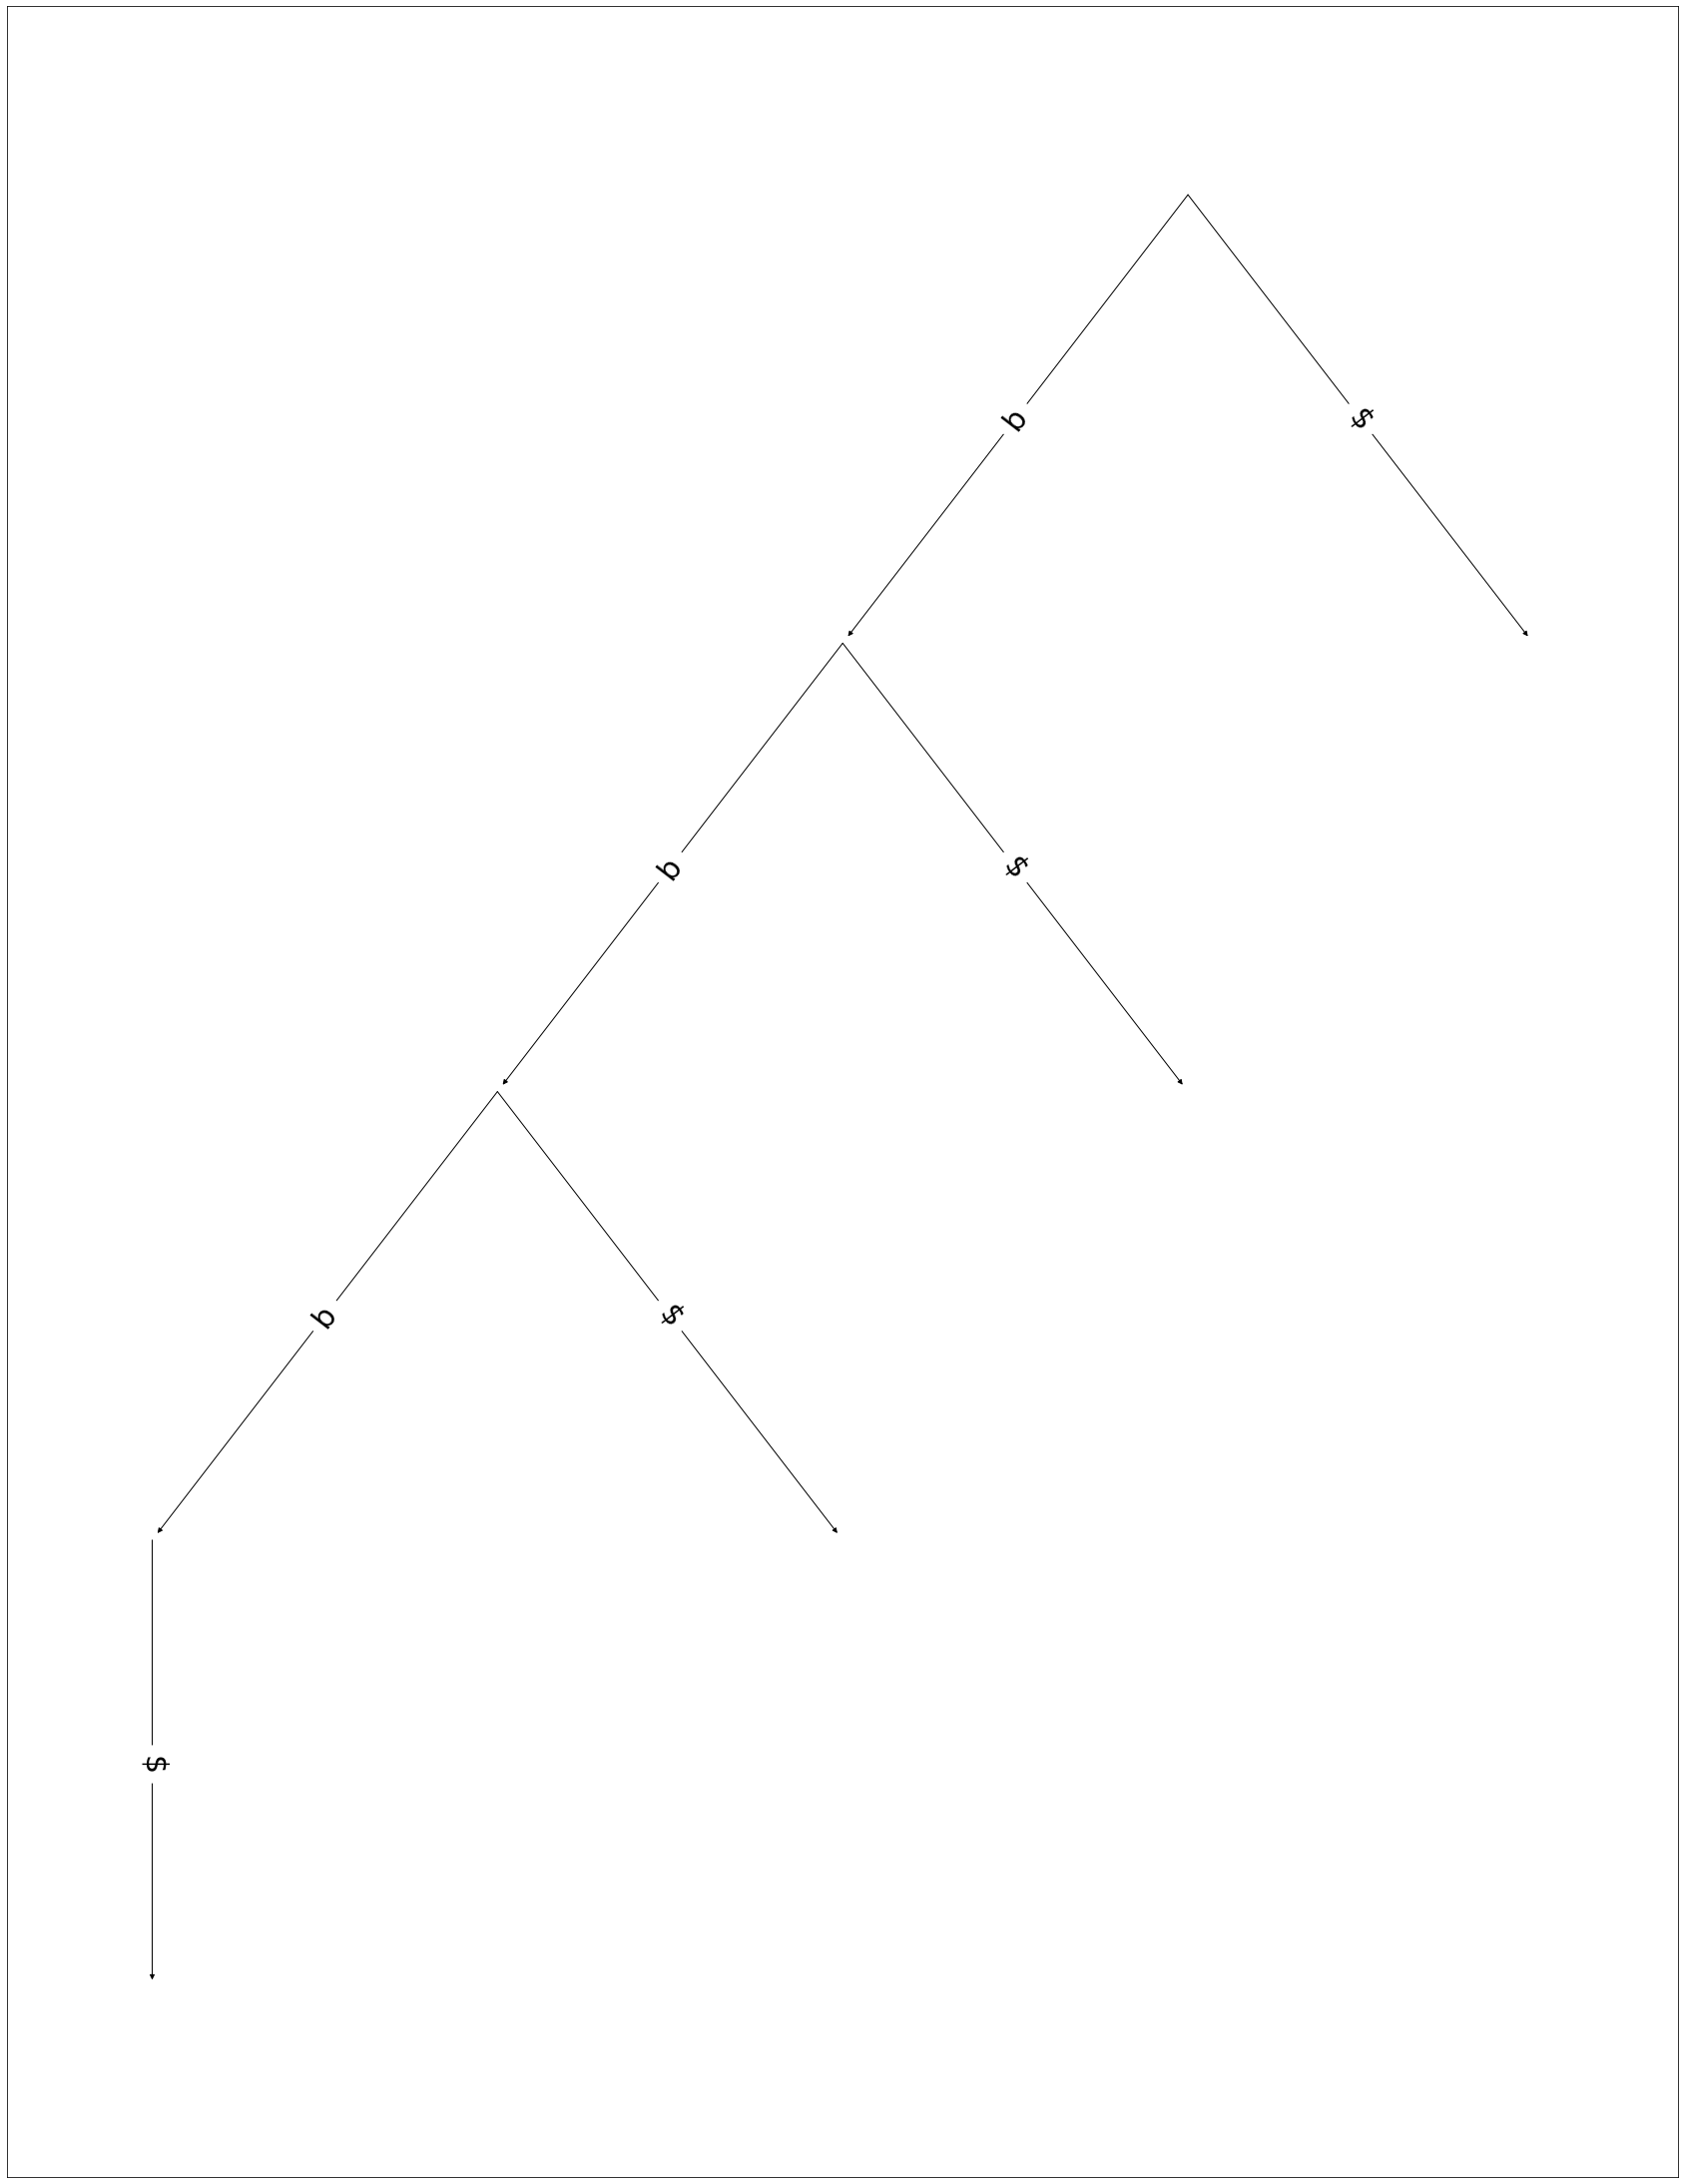

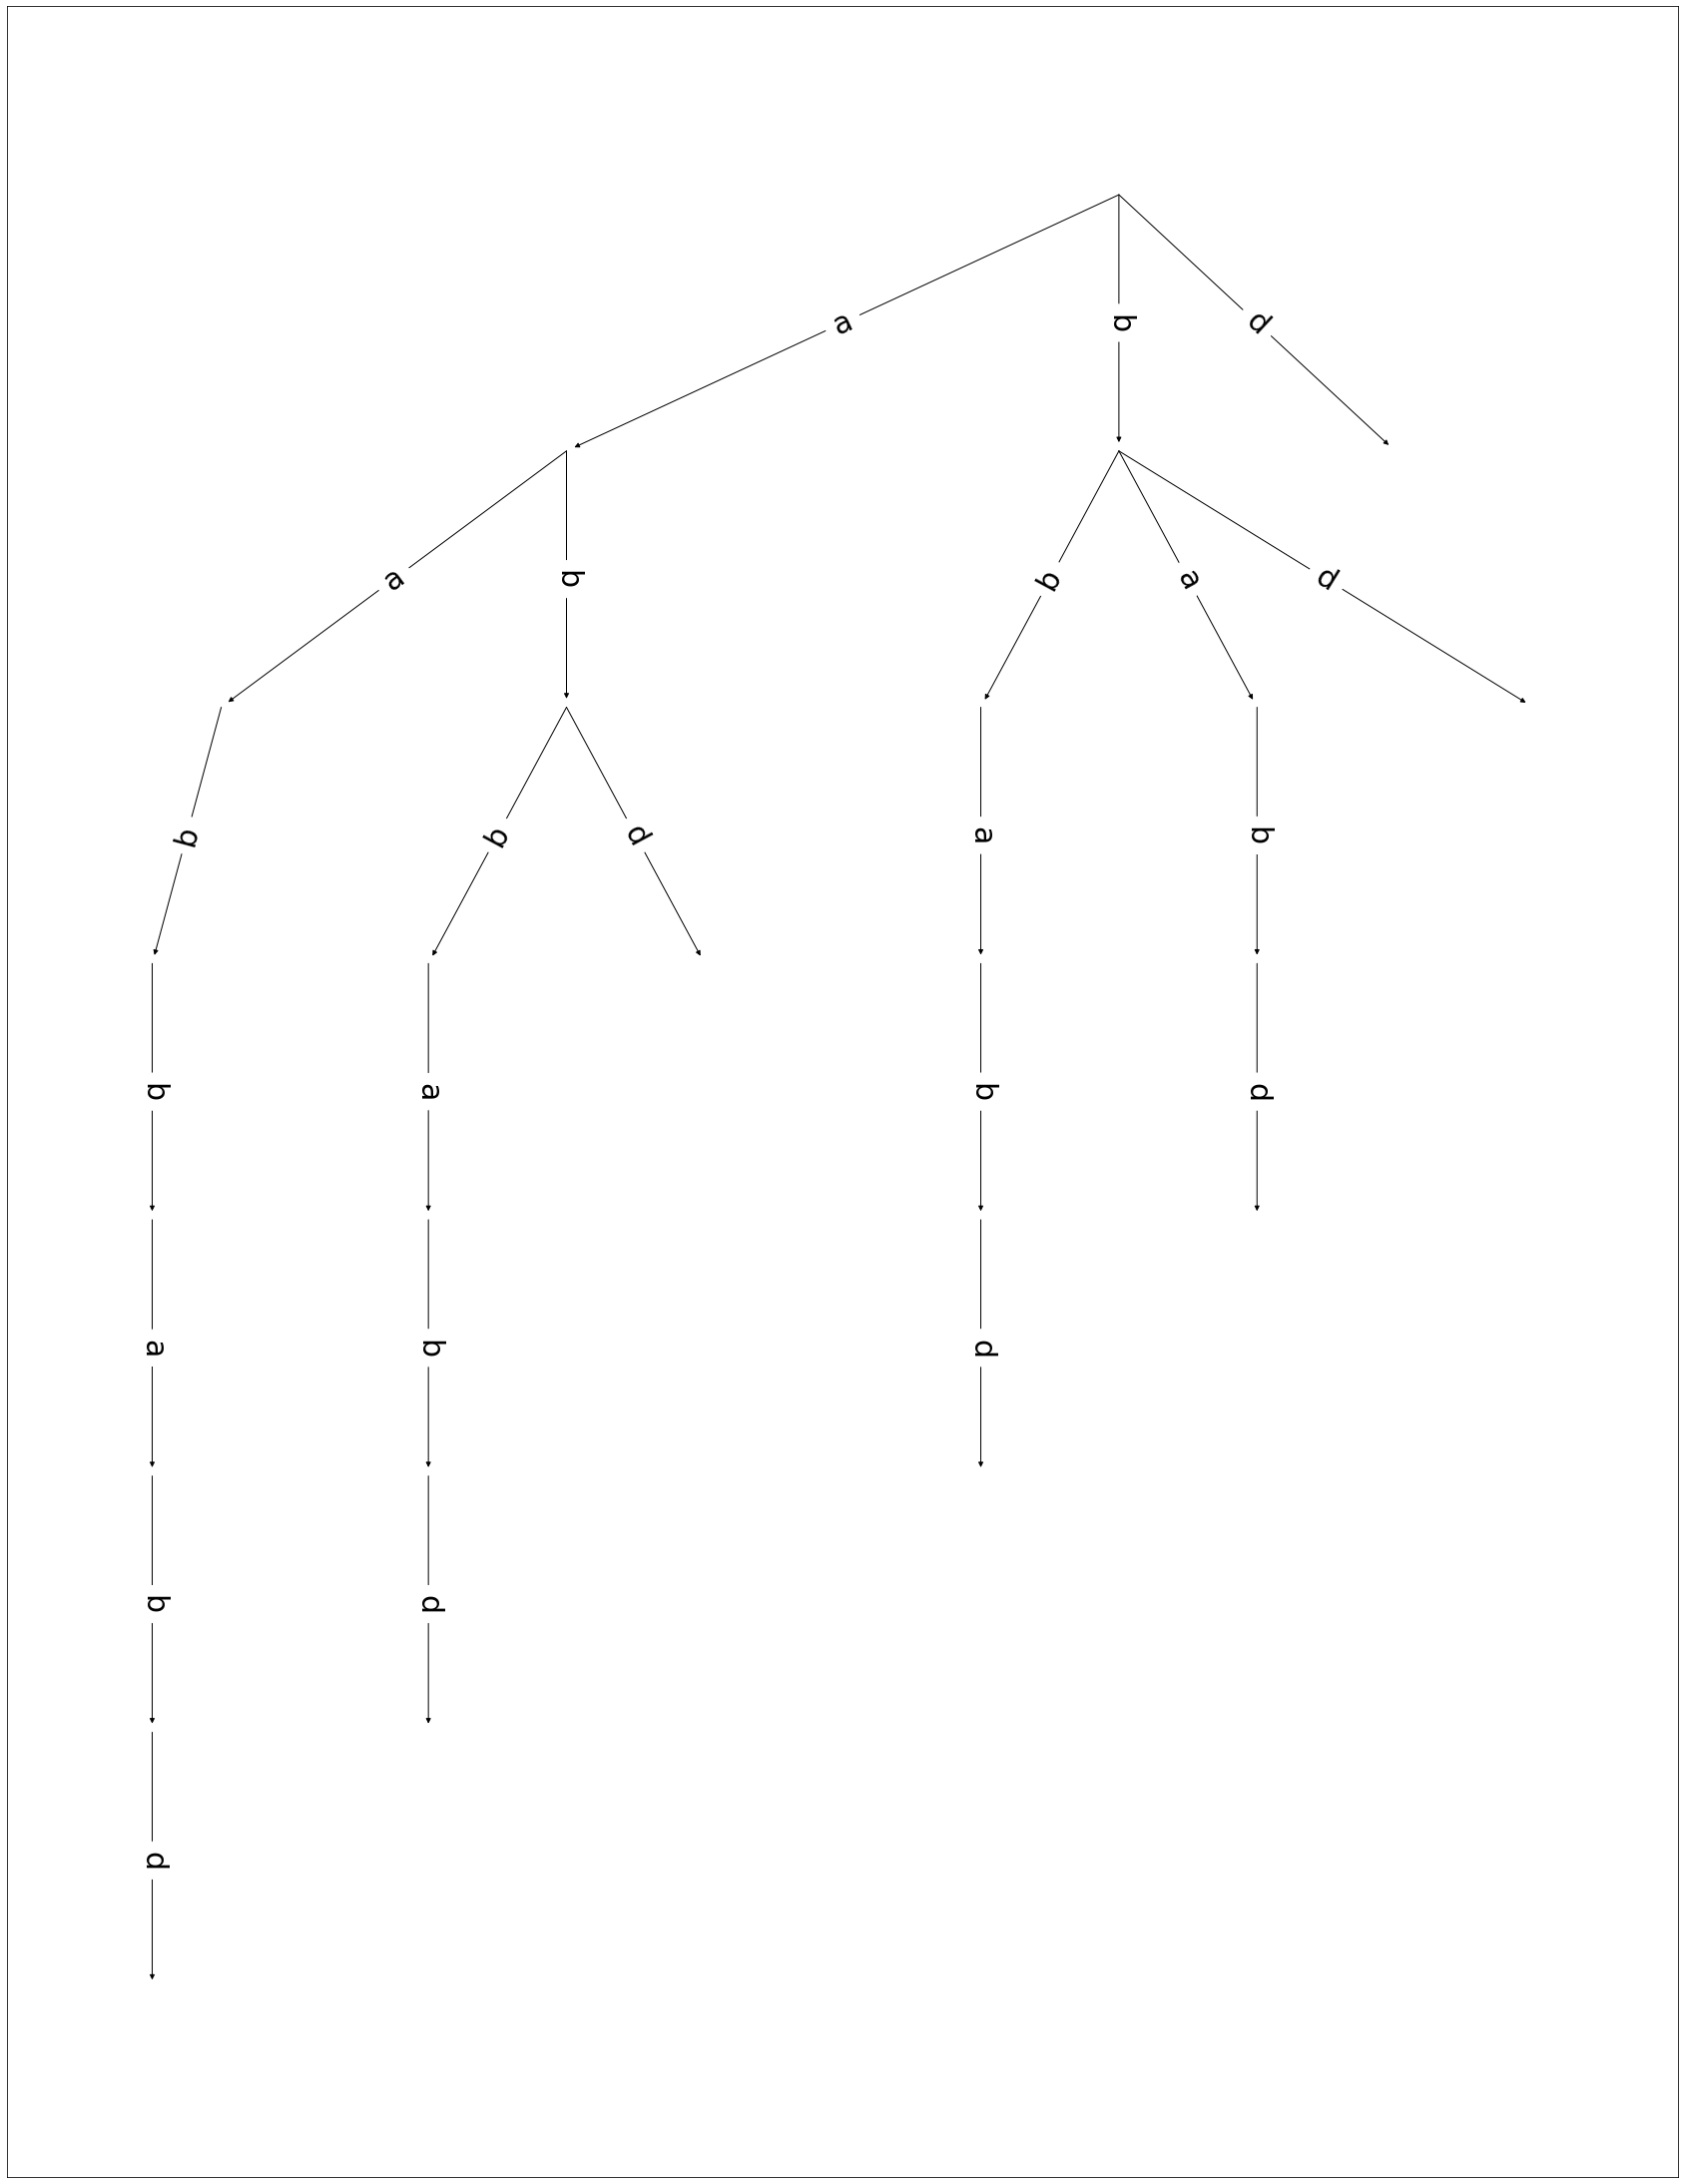

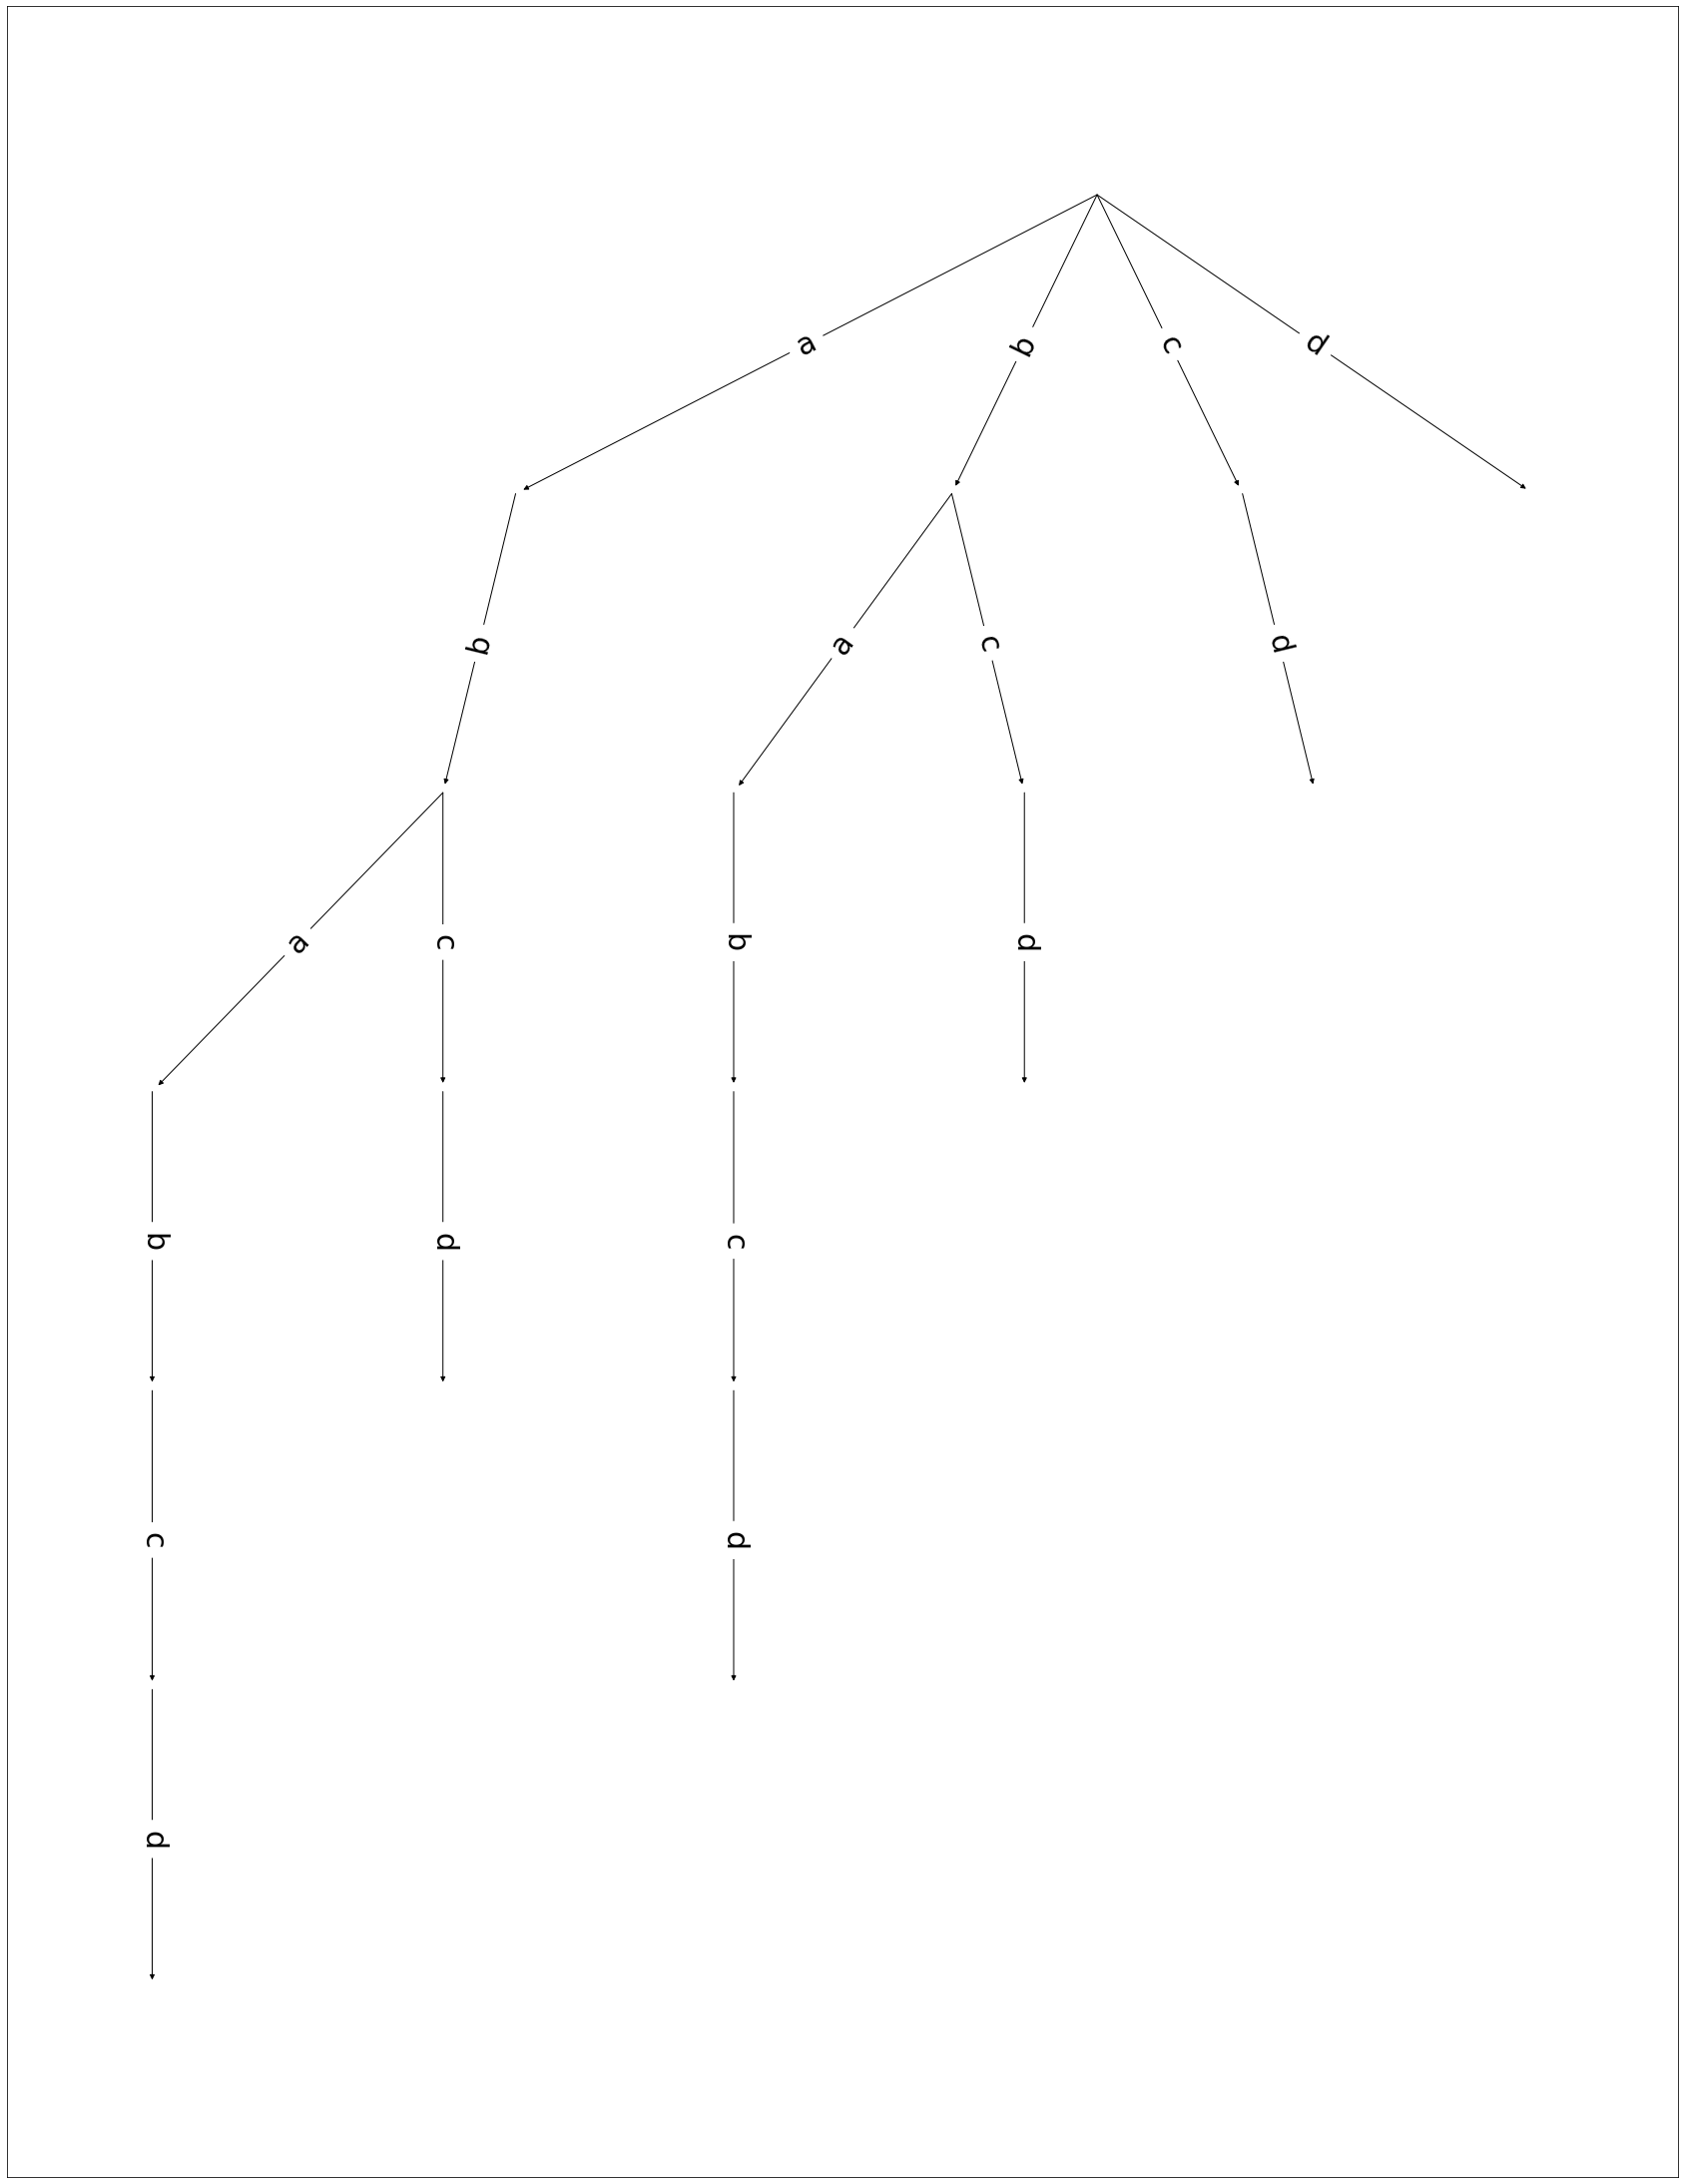

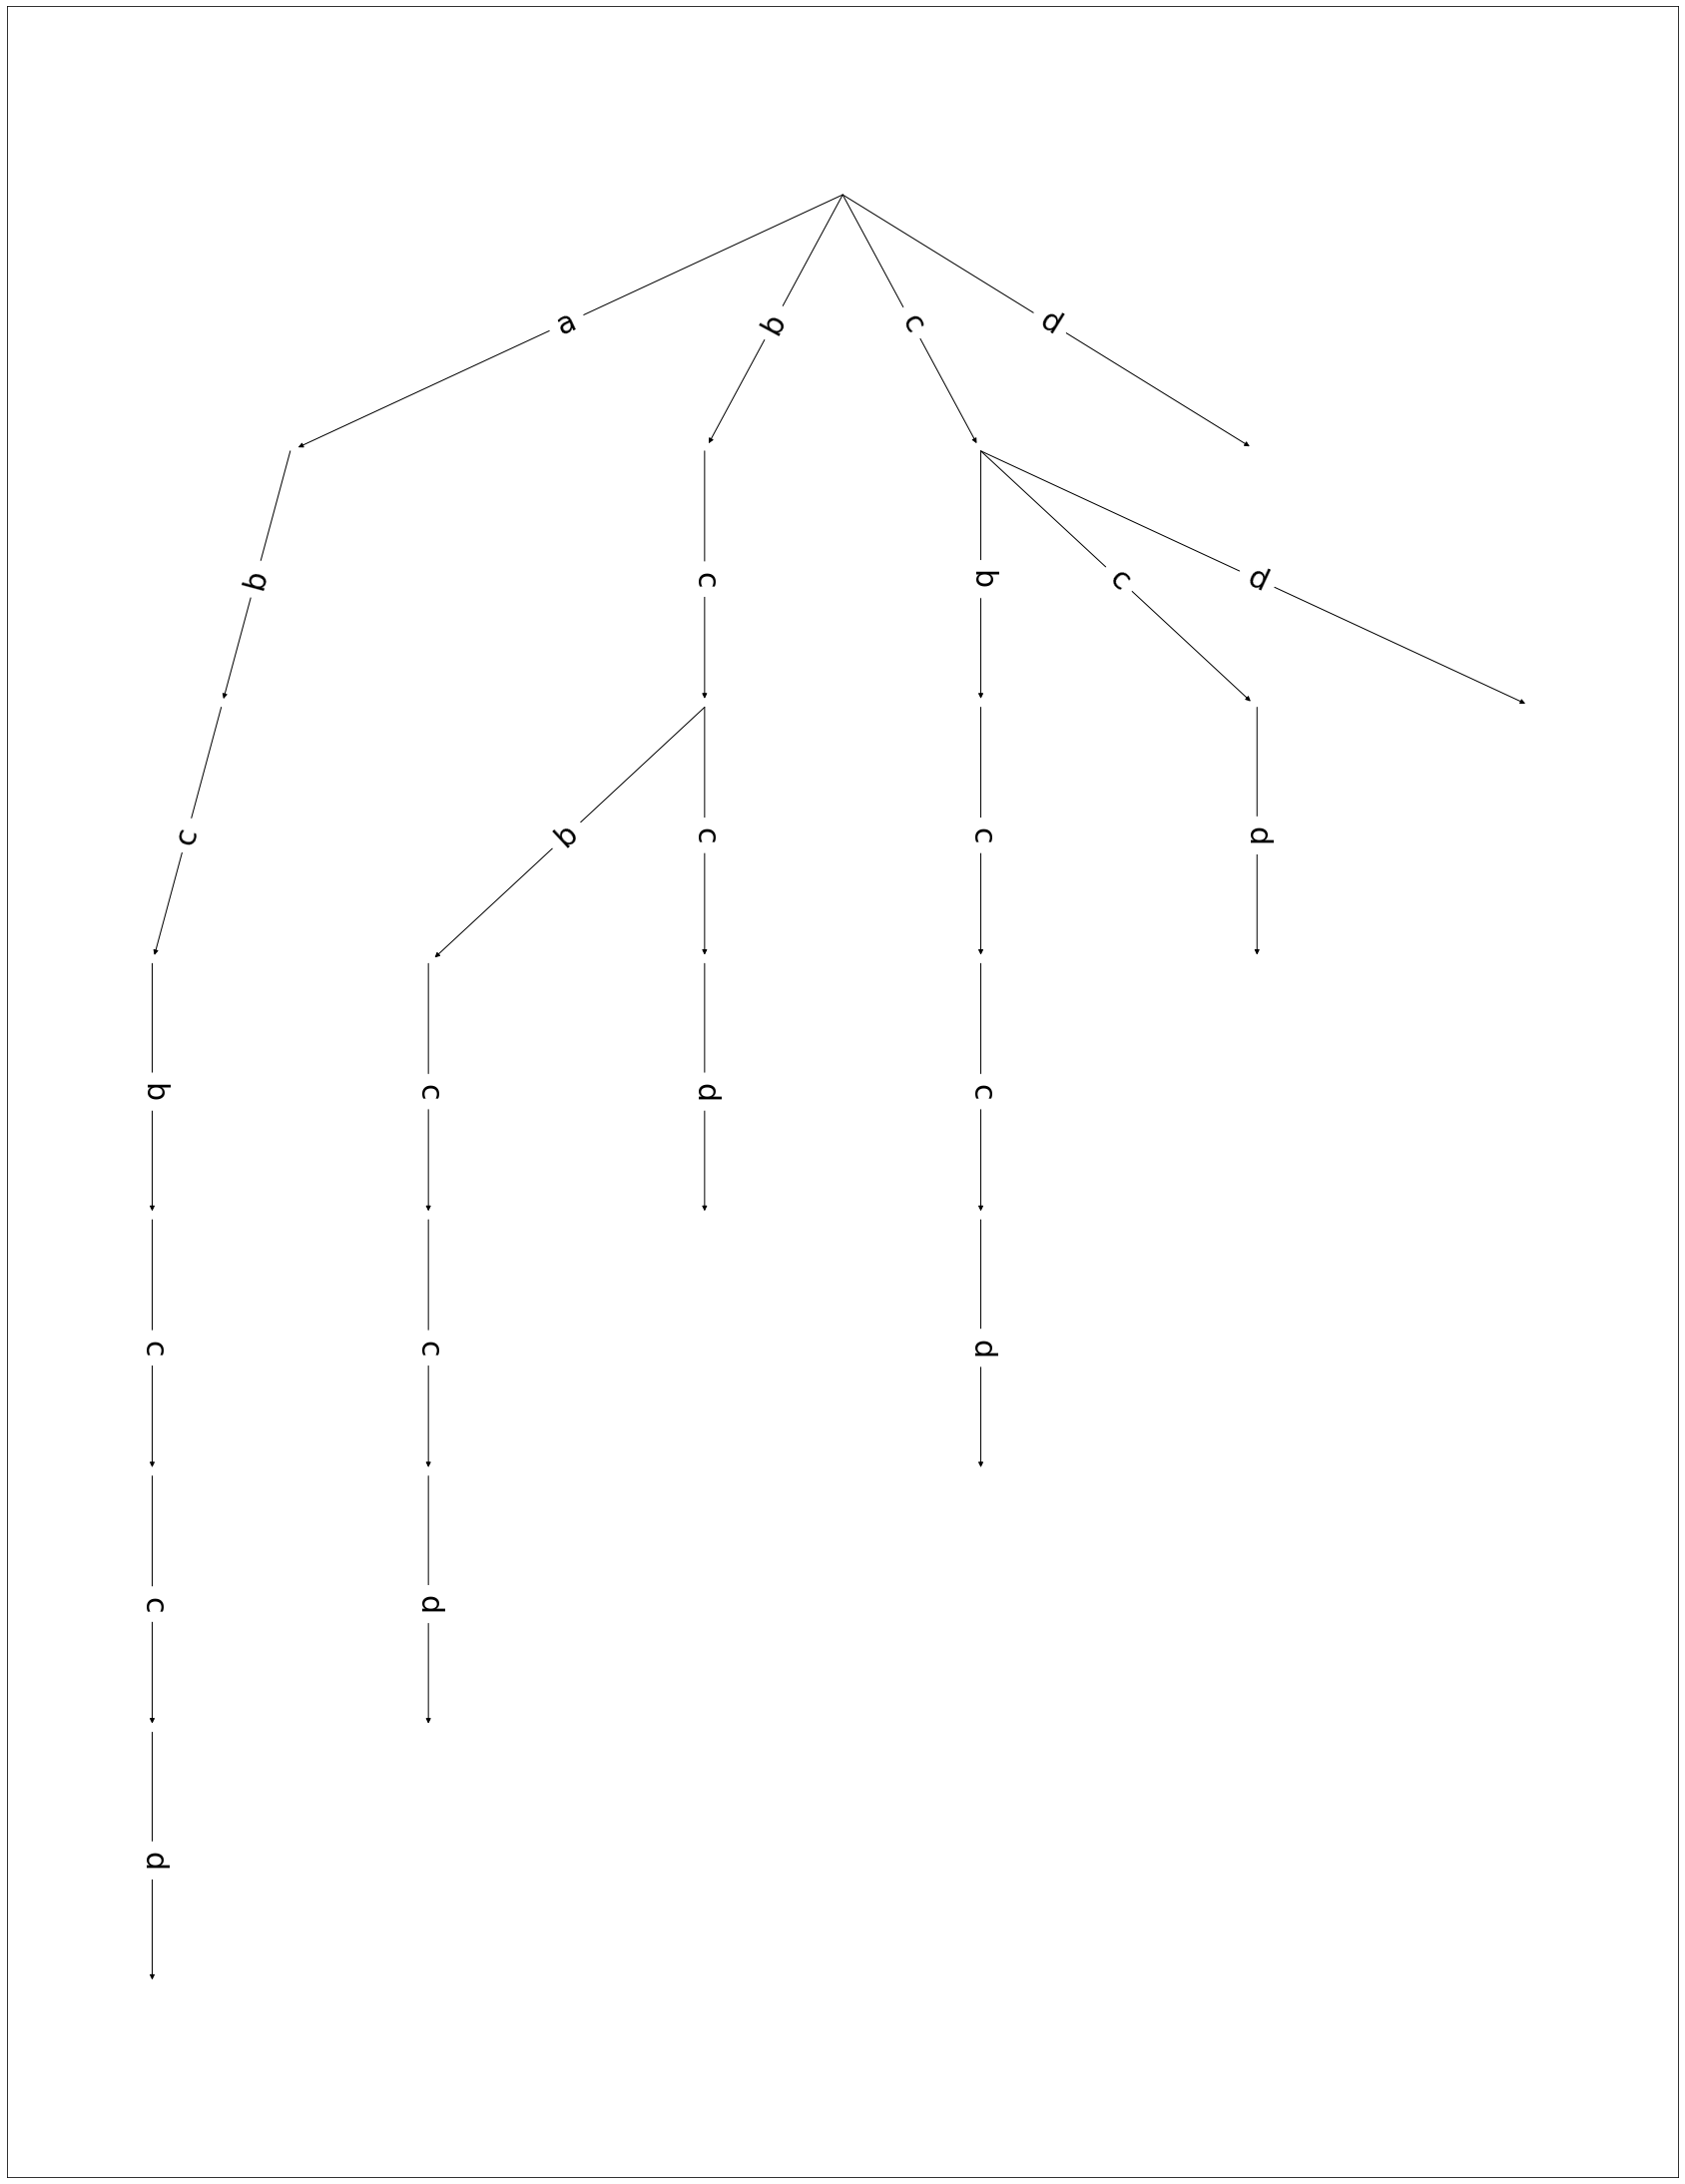

In [7]:
draw_trie(trie(ex1))
draw_trie(trie(ex2))
draw_trie(trie(ex3), "trie_example.png")
draw_trie(trie(ex4))

## Finding text in trie

In [8]:
def is_text_in_trie(trie_root, text):
    curr_node = trie_root
    for l in text:
        if l not in curr_node.children:
            return False
        else:
            curr_node = curr_node.children[l]
    return True

## Testing

In [9]:
def test_trie(text, show_text=True):
    root = trie(text)
    text_len = len(text)
    for i in range(0, text_len):
        for j in range(i+1, text_len):
            if not is_text_in_trie(root, text[i:j]):
                if show_text:
                    print(f"Test for {text} failed at {text[i:j]}")
                else:
                    print("Test failed")
                return
    
    if show_text:    
        print(f"All tests for {text} passed")
    else:
        print("All tests passed")

### Whole file 1997_714.txt was too large to build a trie from it, so only first 1000 characters were used to testing

In [10]:
test_trie(ex1)
test_trie(ex2)
test_trie(ex3)
test_trie(ex4)
test_trie(prepare_text(ex5[:1000]))

All tests for bbb$ passed
All tests for aabbabd passed
All tests for ababcd passed
All tests for abcbccd passed
All tests for 



Dz.U. z 1998 r. Nr 144, poz. 930
                                       
                                       
                                       
                                       
                                    USTAWA
                          z dnia 20 listopada 1998 r.
                                       
         o zryczałtowanym podatku dochodowym od niektórych przychodów
                        osiąganych przez osoby fizyczne
                                       
                                  Rozdział 1
                                Przepisy ogólne
                                       
                                    Art. 1.
Ustawa reguluje opodatkowanie zryczałtowanym podatkiem dochodowym niektórych
przychodów (dochodów) osiąganych przez osoby fizyczne prowadzące pozarolniczą
działalność gospodarczą oraz przez osoby d

In [11]:
def draw_text_in_trie(trie_root, text, filename = None):
    if is_text_in_trie(trie_root, text):
        print(f"{text} found :)")
        plt.figure(figsize=(30,50))
        G = nx.DiGraph()

        dfs(trie_root, G)
        
        edge_list = list(G.edges())
        text_edge_list = []
        curr_node = trie_root  

        pos = graphviz_layout(G, prog='dot')
        edge_labels = {(u,v): d['L'] for u,v,d in G.edges(data=True)}
        text_edge_labels = {}  
        
        for l in text:
            curr_node = curr_node.children[l]
            e = (curr_node.parent.index, curr_node.index)
            text_edge_list.append(e)
            edge_list.remove(e)
            
            text_edge_labels[e] = edge_labels[e]
            del(edge_labels[e])
            

        nx.draw_networkx_edges(G, pos, edgelist=edge_list, with_labels=False, arrows=True)   
        nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels=edge_labels)
        
        nx.draw_networkx_edges(G, pos, edgelist=text_edge_list, edge_color='b', width=4, with_labels=False, arrows=True)   
        nx.draw_networkx_edge_labels(G, pos, font_color='b', font_size=20, edge_labels=text_edge_labels)
        
        if filename:
            plt.savefig(filename)
        else:
            plt.show()
    else:
        print(f"{text} not found :()")
        draw_trie(trie_root, filename)

bba found :)


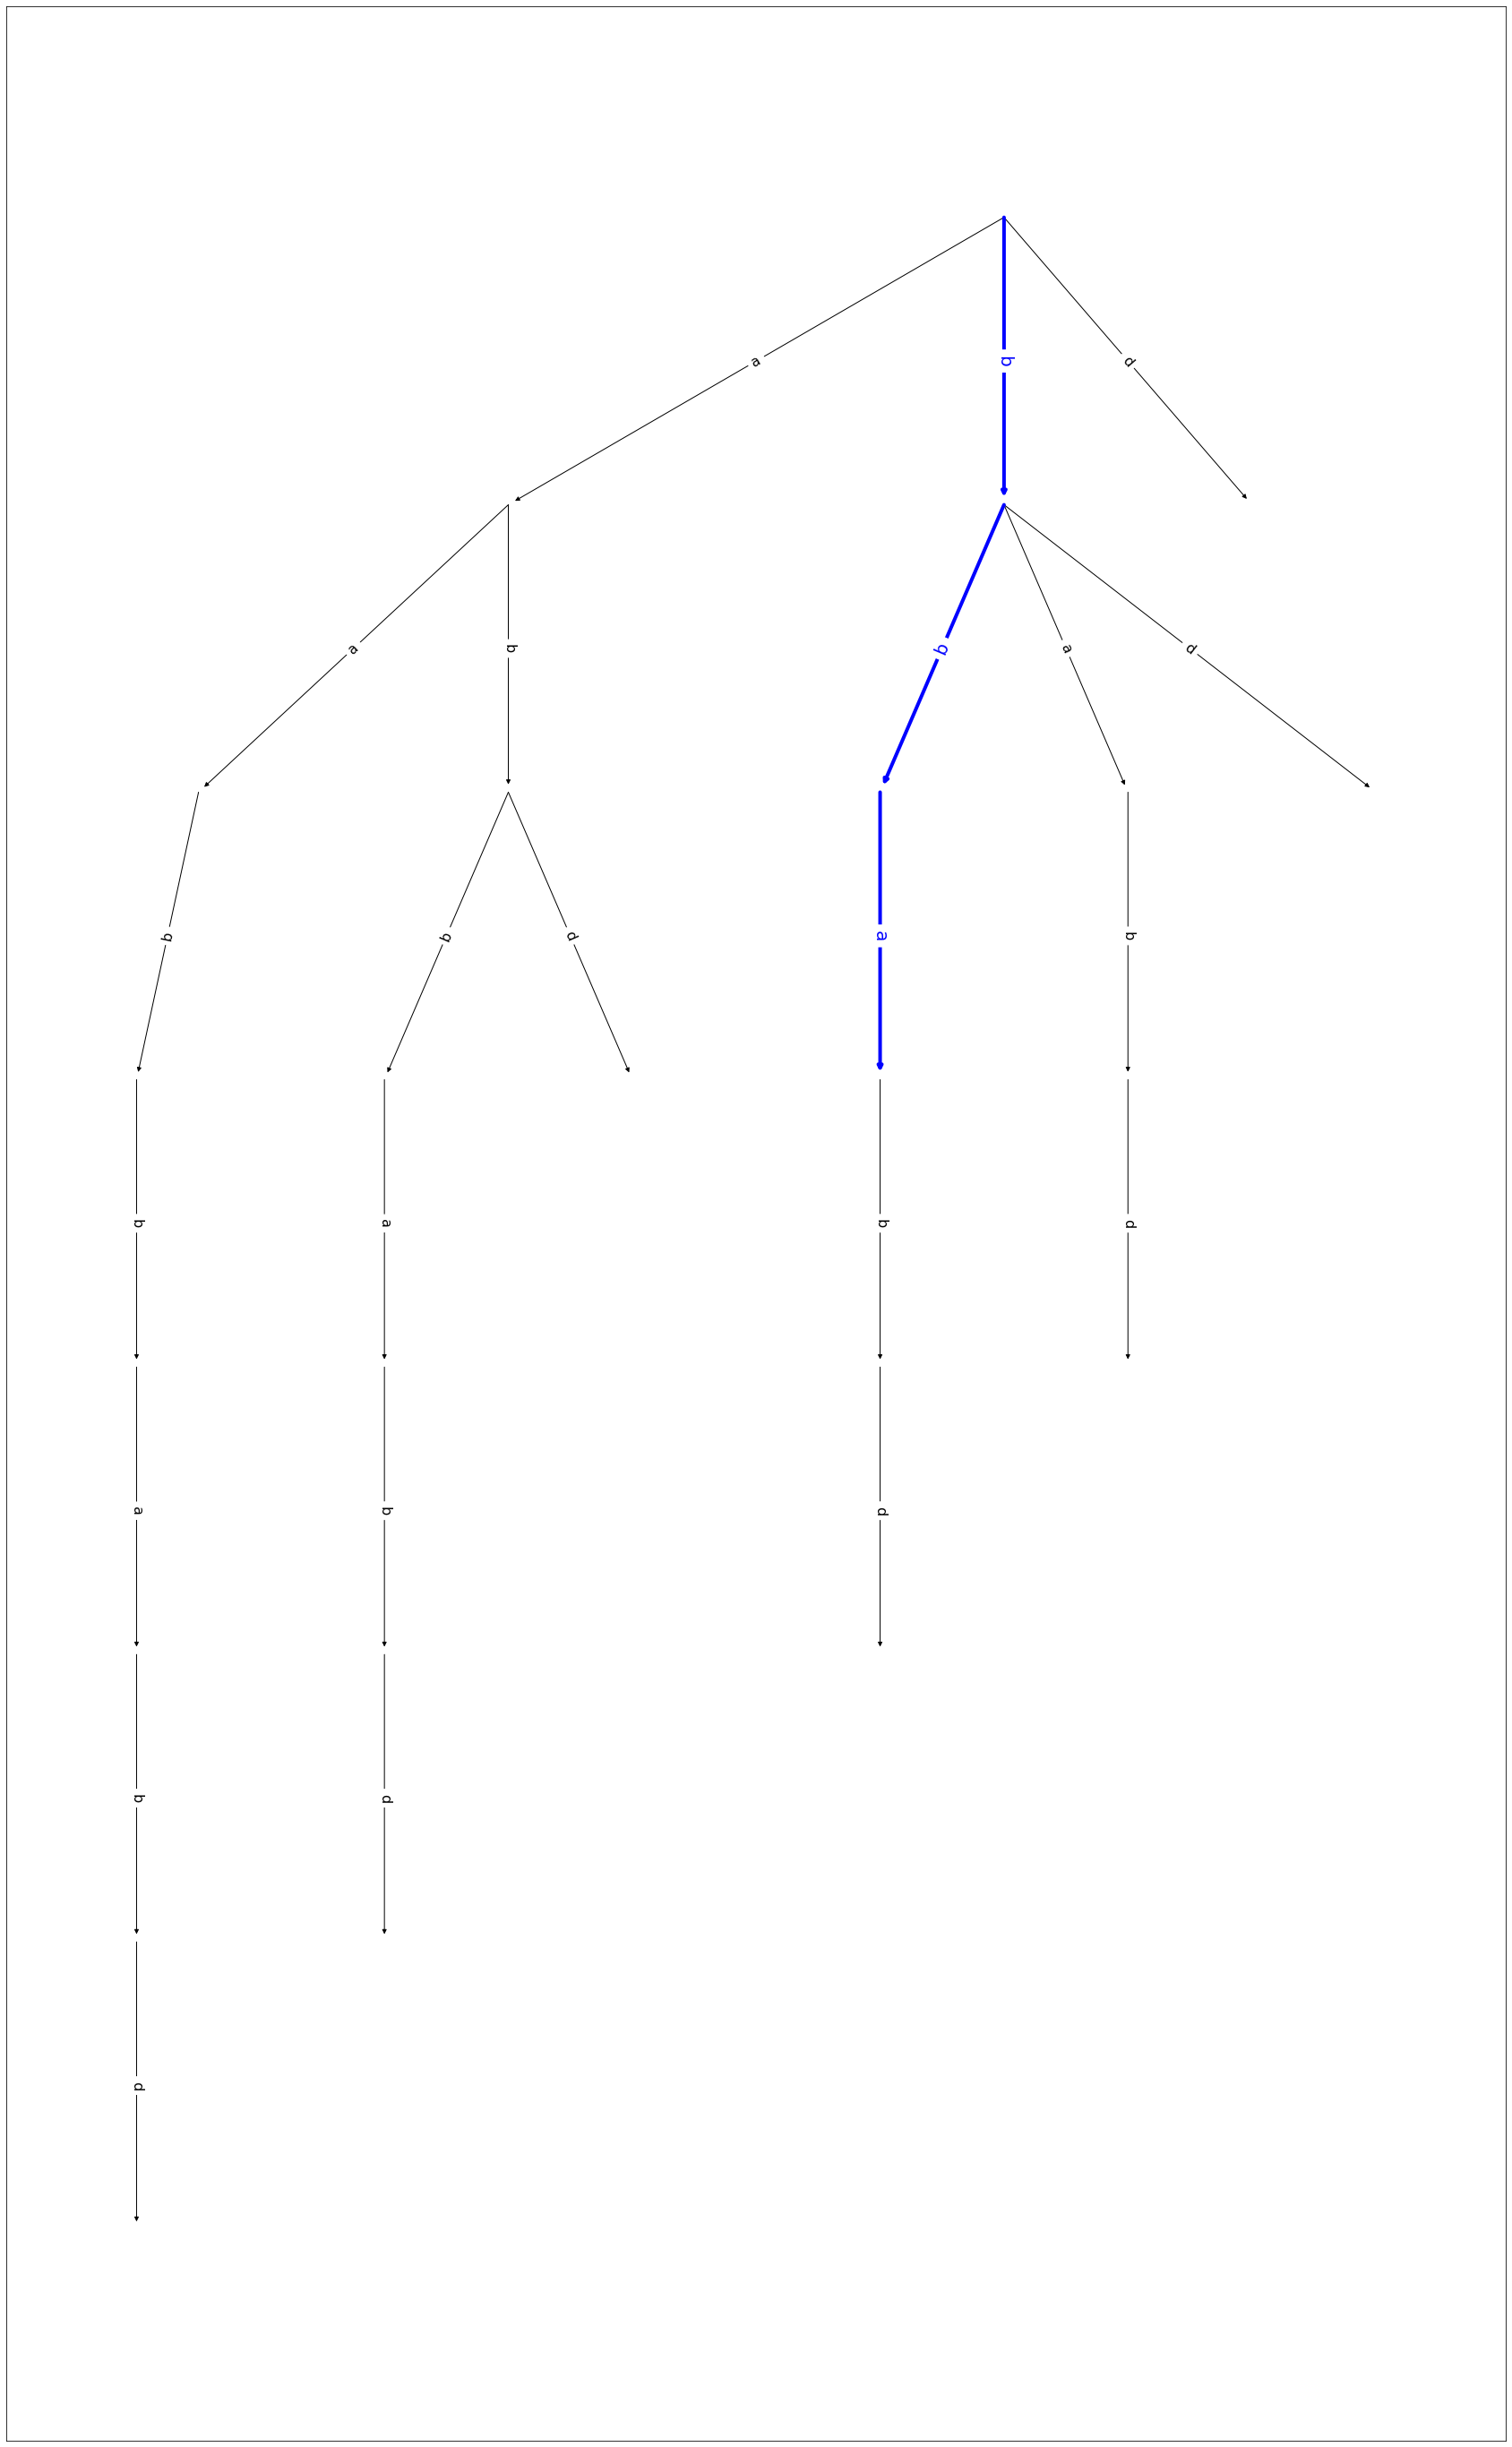

In [12]:
draw_text_in_trie(trie(ex2), "bba", "trie_text_example.png")

# Suffix trees

## Suffix tree building

In [13]:
class SuffNode:
    def __init__(self, tree, start, stop):
        self.start = start
        self.stop = stop
        self.tree = tree
        self.link = None
        self.depth = 0
        self.children = {}
        self.parent = None
        
    def length(self):
        return self.stop - self.start + 1
    
    def label(self):
        return self.tree.text[self.start:self.stop+1]
    
    def letter(self, i):
        return self.tree.text[self.start + i]
    
    def child(self, ch):
        if ch not in self.children:
            return None
        else:
            return self.children[ch]
        
    def add_link(self):
        d = self.depth
        if self.parent == self.tree.root:
            v = self.parent
        else:
            if self.parent.link is None:
                self.parent.add_link()
            v = self.parent.link
            
        offset = 0
        
        if v == self.parent:
            offset = 1
        
        while v.depth < d-1:
            v = v.child(self.tree.text[self.start + v.depth - self.parent.depth + 1])
        if v.depth > d-1:
            v = v.break_path(d-v.parent.depth-1)
        self.link = v
        
    def break_path(self, depth):
        new_node = SuffNode(self.tree, self.start, self.start + depth - 1)
        self.start += depth
        
        self.parent.children[self.tree.text[new_node.start]] = new_node
        new_node.parent = self.parent
        
        new_node.children[self.letter(0)] = self
        self.parent = new_node
        
        new_node.depth = new_node.parent.depth + depth
        
        return new_node
    
    def graft(self, start):
        new_node = SuffNode(self.tree, start, self.tree.text_length-1)
        
        new_node.parent = self
        self.children[self.tree.text[start]] = new_node
        
        return new_node
                

class SuffTree:
    def __init__(self, text):
        self.text = text
        self.text_length = len(text)
        self.root = SuffNode(self, 0, -1)
        self.root.link = self.root
        
        child = SuffNode(self, 0, self.text_length-1)
        child.parent = self.root
        child.depth = self.text_length
        self.root.children[text[0]] = child
        
    def simple_build(self):
        for i in range(1, self.text_length):
            node = self.root
            depth = 0
            while node.child(self.text[i + depth]):
                node = node.child(self.text[i + depth])
                depth += 1
                node_depth = 1
                while node.start + node_depth <= node.stop and node.letter(node_depth) == self.text[i + depth]:
                    depth += 1
                    node_depth += 1
                if node.start + node_depth <= node.stop and node.letter(node_depth) != self.text[i + depth]:
                    node = node.break_path(node_depth)
                    break
            node.graft(i + depth)
            
    def mc_creight(self):
        node = self.root
        self.root.link = self.root
        self.root.depth = 0
        for i in range(1, self.text_length):
            depth = node.depth
            while node.child(self.text[i + depth]):
                node = node.child(self.text[i + depth])
                depth += 1
                node_depth = 1
                while node.start + node_depth <= node.stop and node.letter(node_depth) == self.text[i + depth]:
                    depth += 1
                    node_depth += 1
                if node.start + node_depth <= node.stop and node.letter(node_depth) != self.text[i + depth]:
                    node = node.break_path(node_depth)
                    break
            node.graft(i + depth).depth = self.text_length - i
            if node.link is None:
                node.add_link()
            node = node.link
    
    def find_subword(self, text):
        u = self.root
        node_d = 0
        for c in text:
            if u.start + node_d <= u.stop:
                if u.letter(node_d) == c:
                    node_d += 1
                else:
                    return False
            else:
                u = u.child(c)
                if u is None:
                    return False
                else:
                    node_d = 1
        return True

## Suffix tree visualisation

In [14]:
def suff_tree_dfs(node, G, tree, index = 0):
    node.index = index
    
    if node.parent is not None:
        G.add_edge(node.parent.index, index, L=node.label())
        
    index += 1
    for v in node.children.values():
        index = suff_tree_dfs(v, G, tree, index)
    return index

def links_tree(node, F):
    if node.link is not None and node.link != node:
        F.add_edge(node.index, node.link.index)
    
    for v in node.children.values():
        links_tree(v, F)

def draw_suff_tree(tree, filename = None, show_links = False):
    plt.figure(figsize=(30,50))
    
    G = nx.DiGraph()
    
    suff_tree_dfs(tree.root, G, tree)
    
    pos = graphviz_layout(G, prog='dot')
        
    edge_labels = {(u,v): d['L'] for u,v,d in G.edges(data=True)} 
    
    nx.draw_networkx_edges(G, pos, with_labels=False, arrows=True)   
    nx.draw_networkx_edge_labels(G, pos, font_size=30, edge_labels=edge_labels)
    
    
    if show_links:
        links = nx.DiGraph()
        links_tree(tree.root, links)
        nx.draw_networkx_edges(G, pos, edgelist=list(links.edges()), with_labels=False, arrows=True, connectionstyle='arc3,rad=0.4',style='dotted,dashdot')
    
    
    plt.figtext(.5, .9, tree.text, fontsize=30, ha='center')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

## Suffix tree testing

In [15]:
def test_simple_suffix_tree(text, show_text = None, jump = 1, max_length = None):
    if show_text is None:
        if len(text) > 100:
            show_text = False
        else:
            show_text = True
    tree = SuffTree(text)
    tree.simple_build()
    text_len = len(text)
    if max_length is None:
        max_length = text_len
    for start in range(0, text_len, jump):
        last = min([start + max_length, text_len])
        for stop in range(start+1, last):
            if not tree.find_subword(text[start:stop]):
                if show_text:
                    print(f"Test for {text} failed at {text[start:stop]}")
                else:
                    print("Test failed")
                return
    
    if show_text:    
        print(f"All tests for {text} passed")
    else:
        print("All tests passed")
        
def test_mccreight_suffix_tree(text, show_text = None, jump = 1, max_length = None):
    if show_text is None:
        if len(text) > 100:
            show_text = False
        else:
            show_text = True
    tree = SuffTree(text)
    tree.mc_creight()
    text_len = len(text)
    if max_length is None:
        max_length = text_len
    for start in range(0, text_len, jump):
        last = min([start + max_length, text_len])
        for stop in range(start+1, last):
            if not tree.find_subword(text[start:stop]):
                if show_text:
                    print(f"Test for {text} failed at {text[start:stop]}")
                else:
                    print("Test failed")
                return
    
    if show_text:    
        print(f"All tests for {text} passed")
    else:
        print("All tests passed")

In [16]:
test_simple_suffix_tree(ex1)
test_simple_suffix_tree(ex2)
test_simple_suffix_tree(ex3)
test_simple_suffix_tree(ex4)
test_simple_suffix_tree(ex5, show_text=False, jump = 100, max_length = 10)

All tests for bbb$ passed
All tests for aabbabd passed
All tests for ababcd passed
All tests for abcbccd passed
All tests passed


In [17]:
test_mccreight_suffix_tree(ex1)
test_mccreight_suffix_tree(ex2)
test_mccreight_suffix_tree(ex3)
test_mccreight_suffix_tree(ex4)
test_mccreight_suffix_tree(ex5, show_text=False, jump = 100, max_length = 10)

All tests for bbb$ passed
All tests for aabbabd passed
All tests for ababcd passed
All tests for abcbccd passed
All tests passed


## Examples of built suffix trees with links

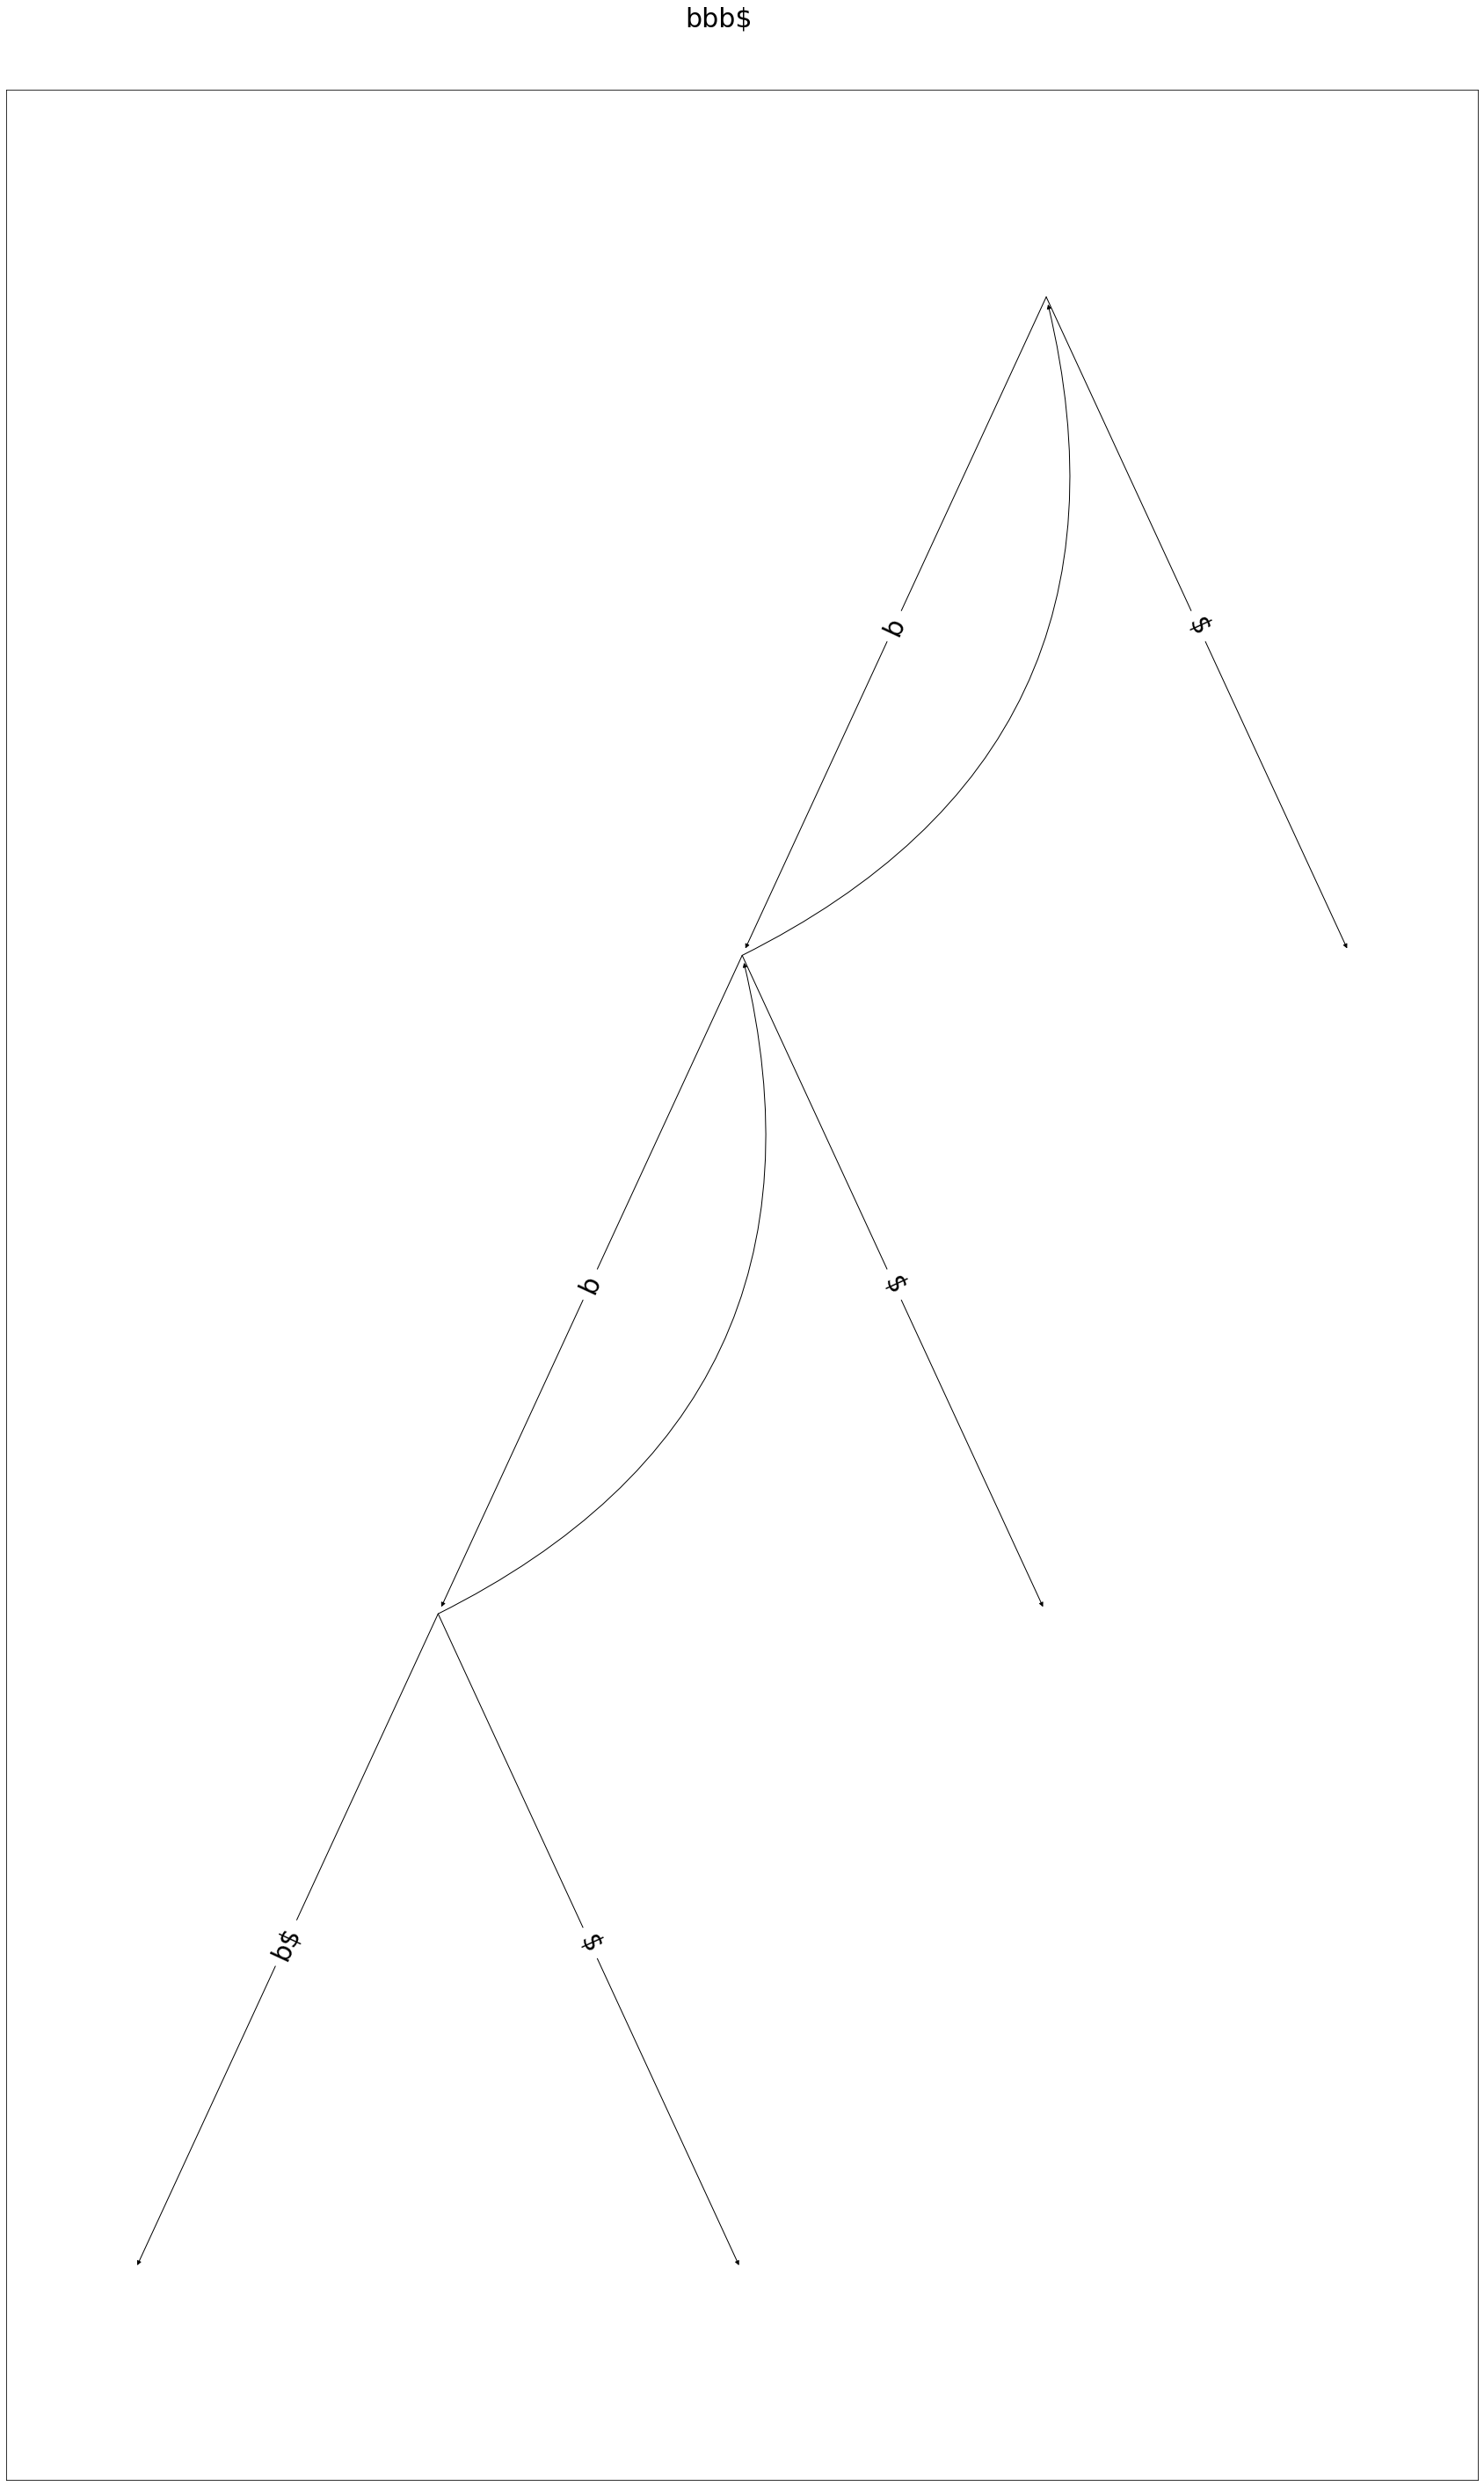

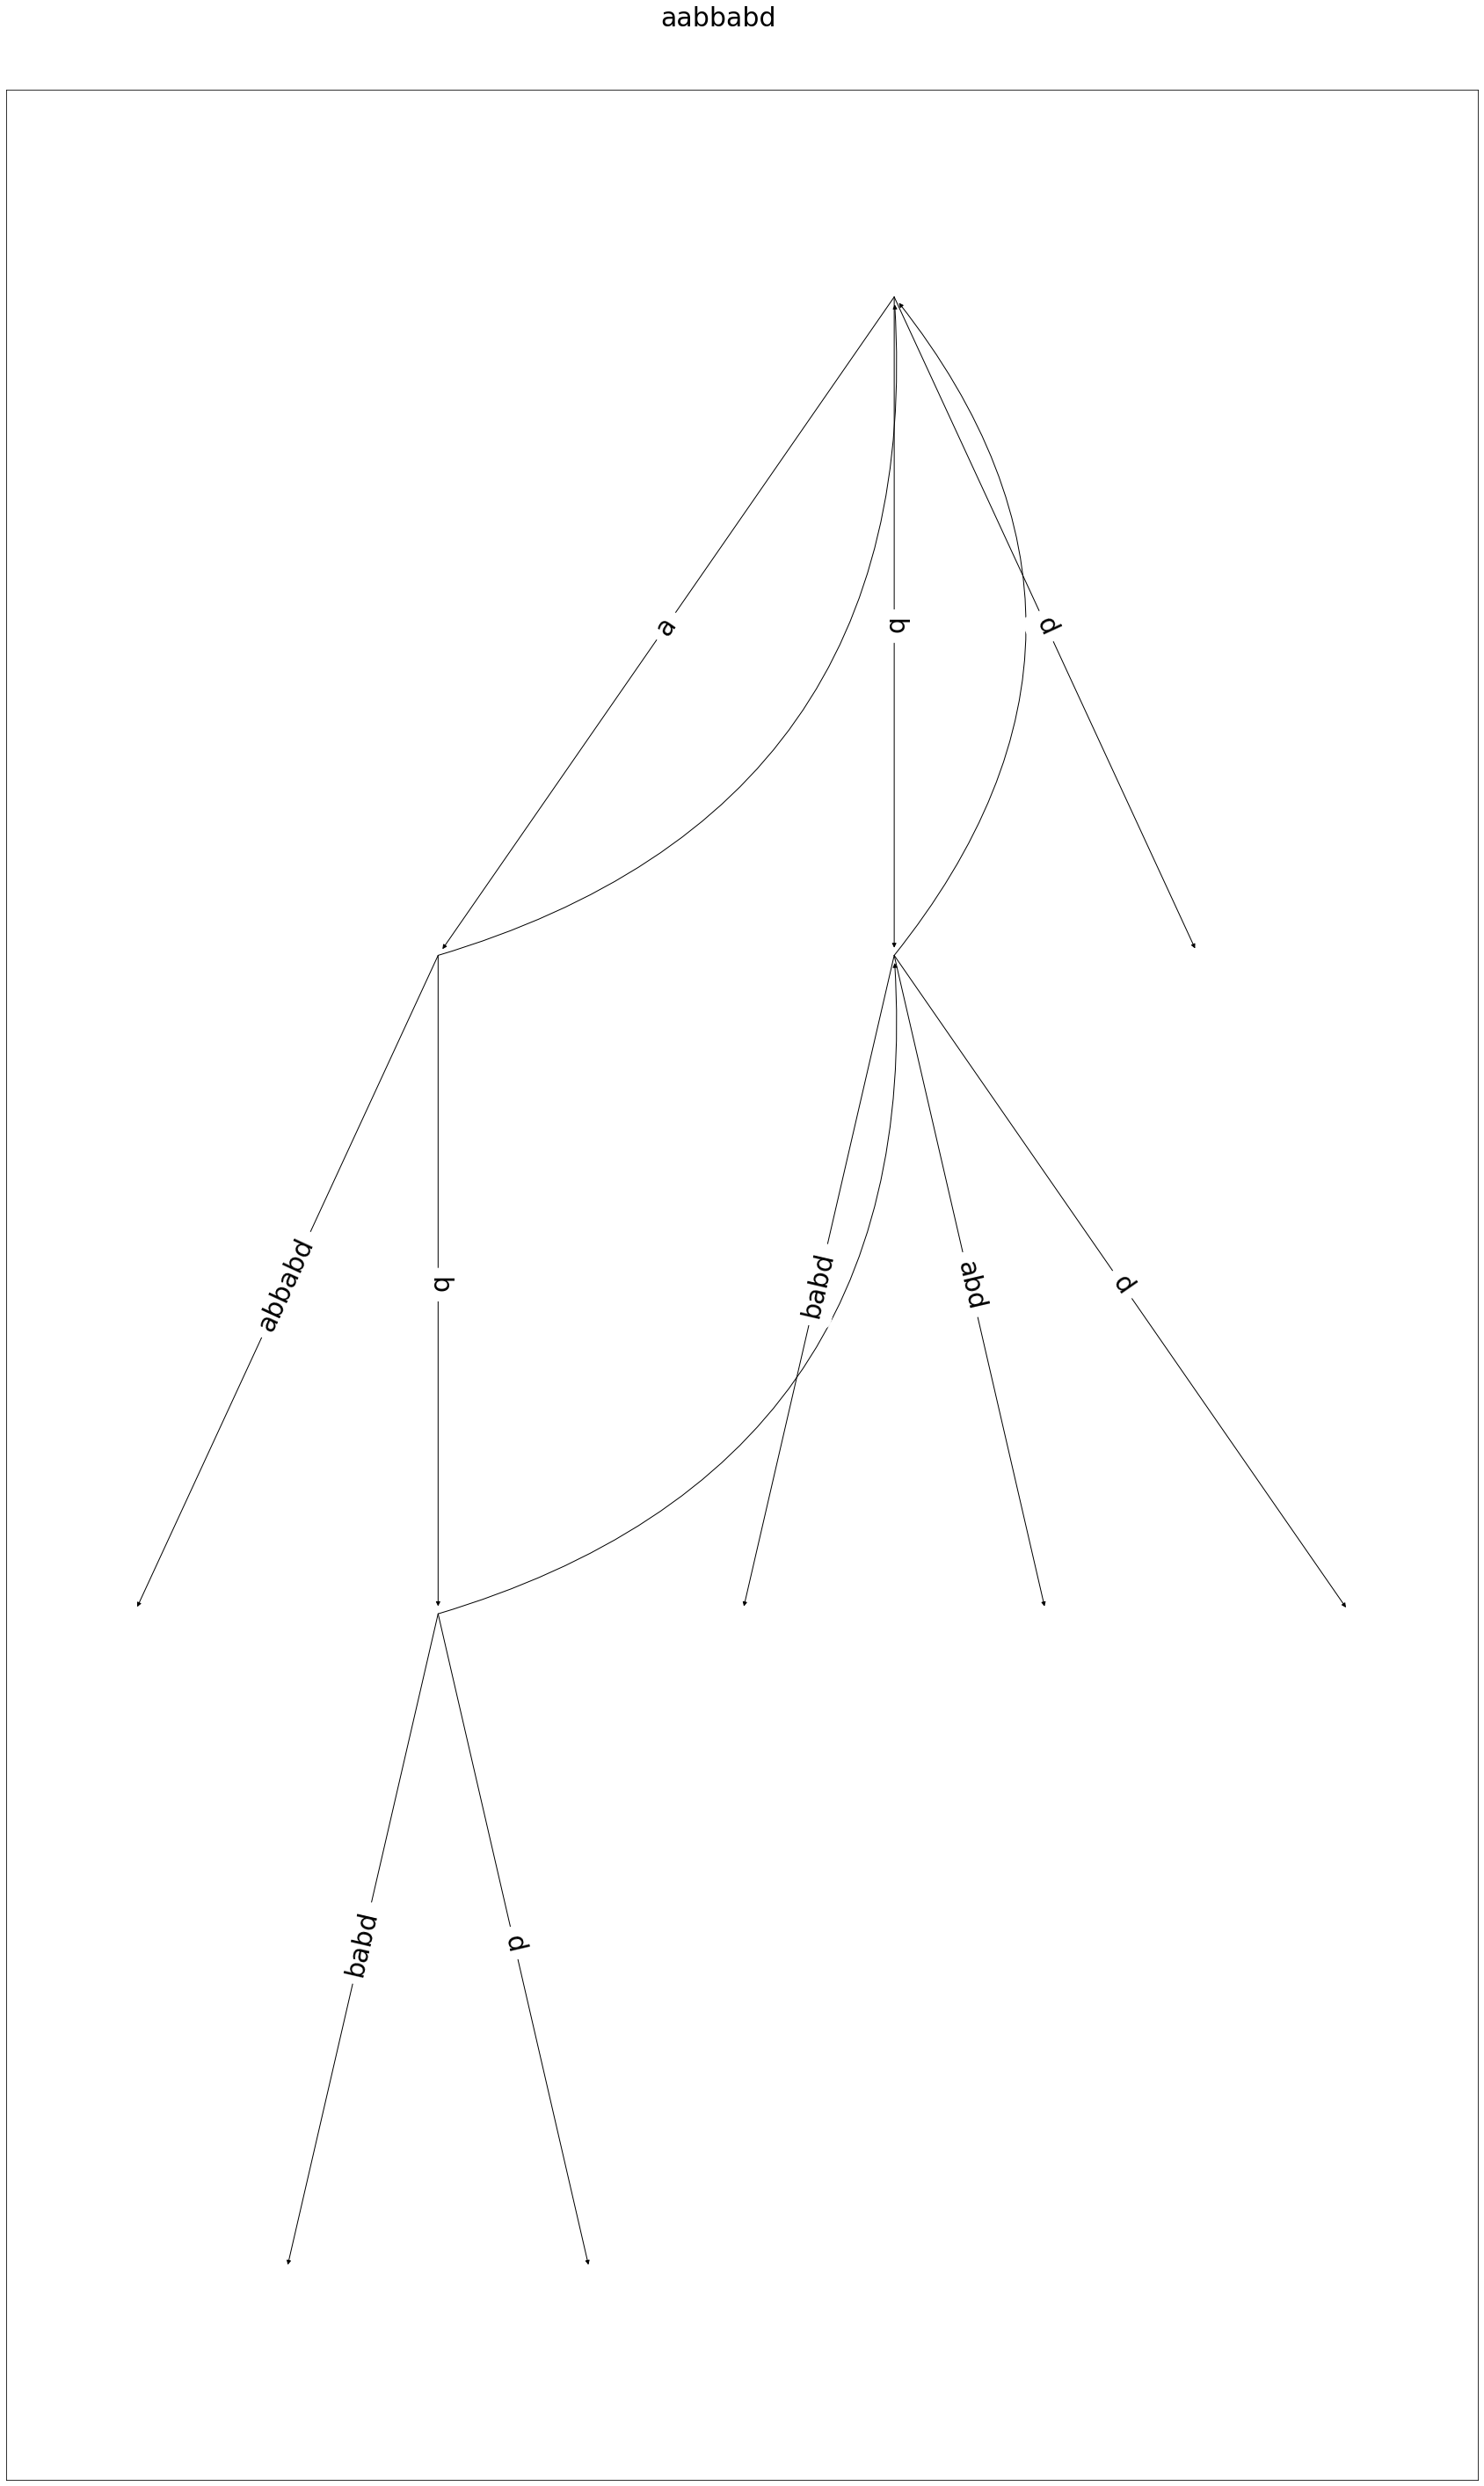

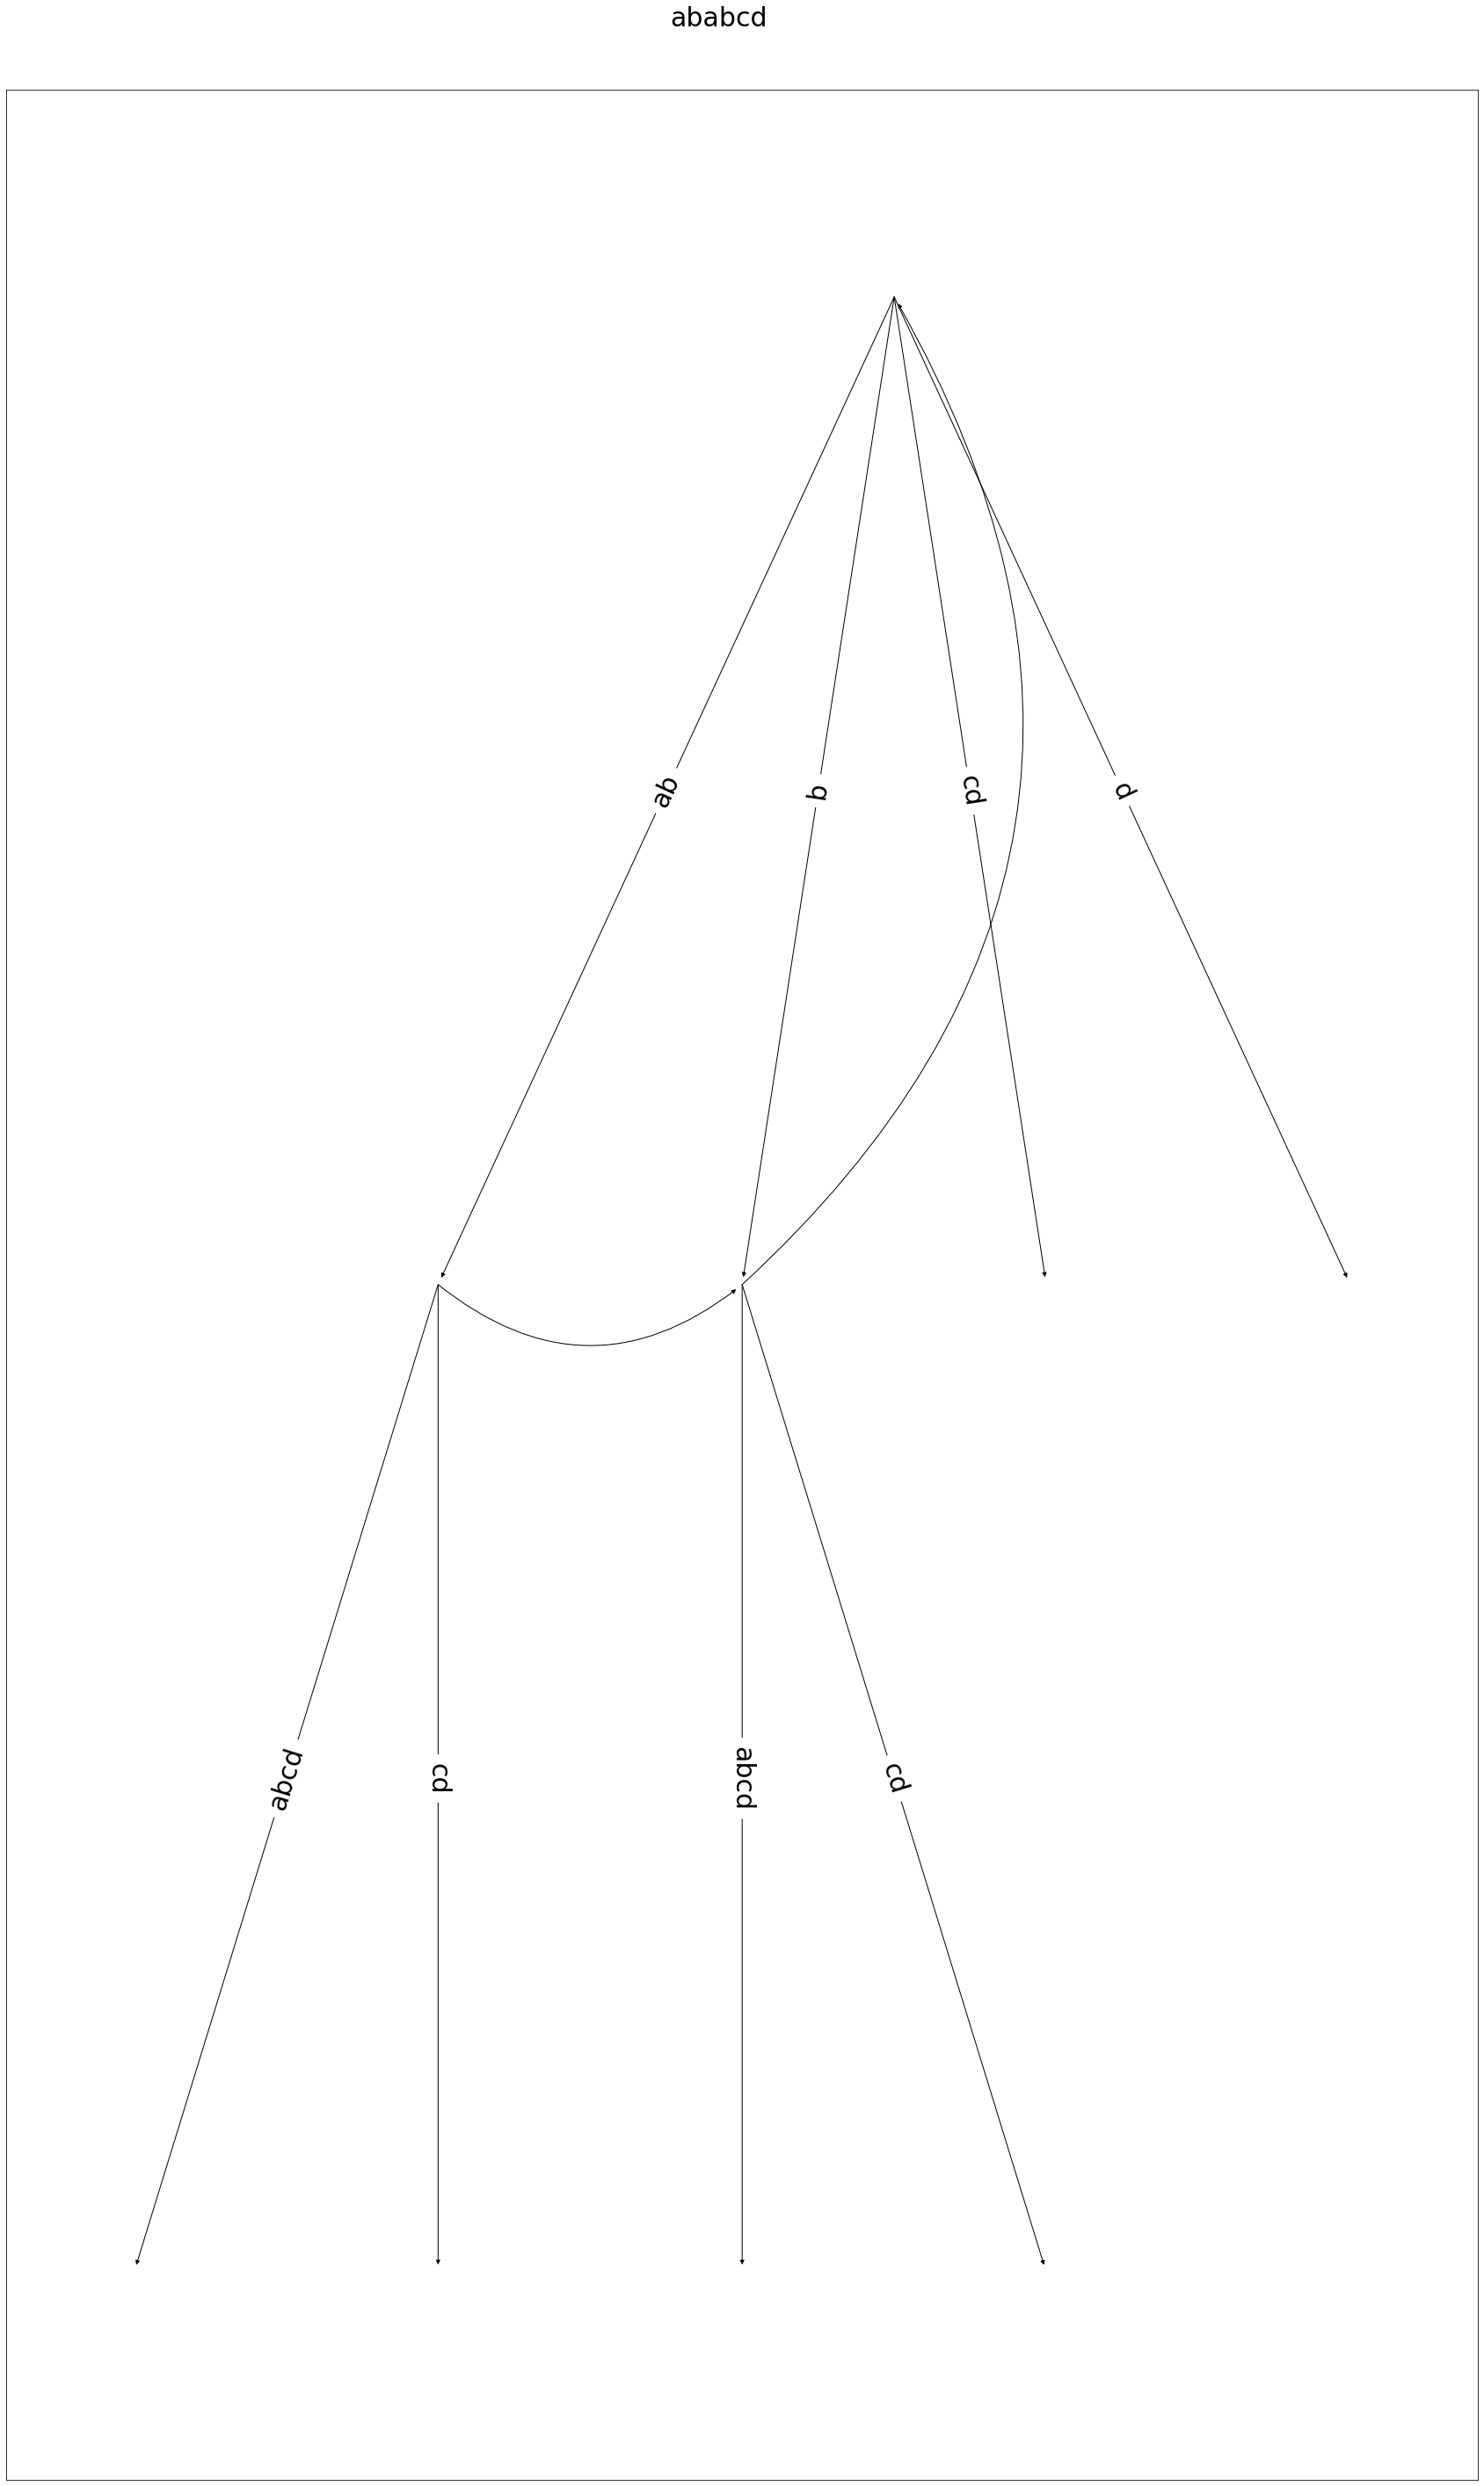

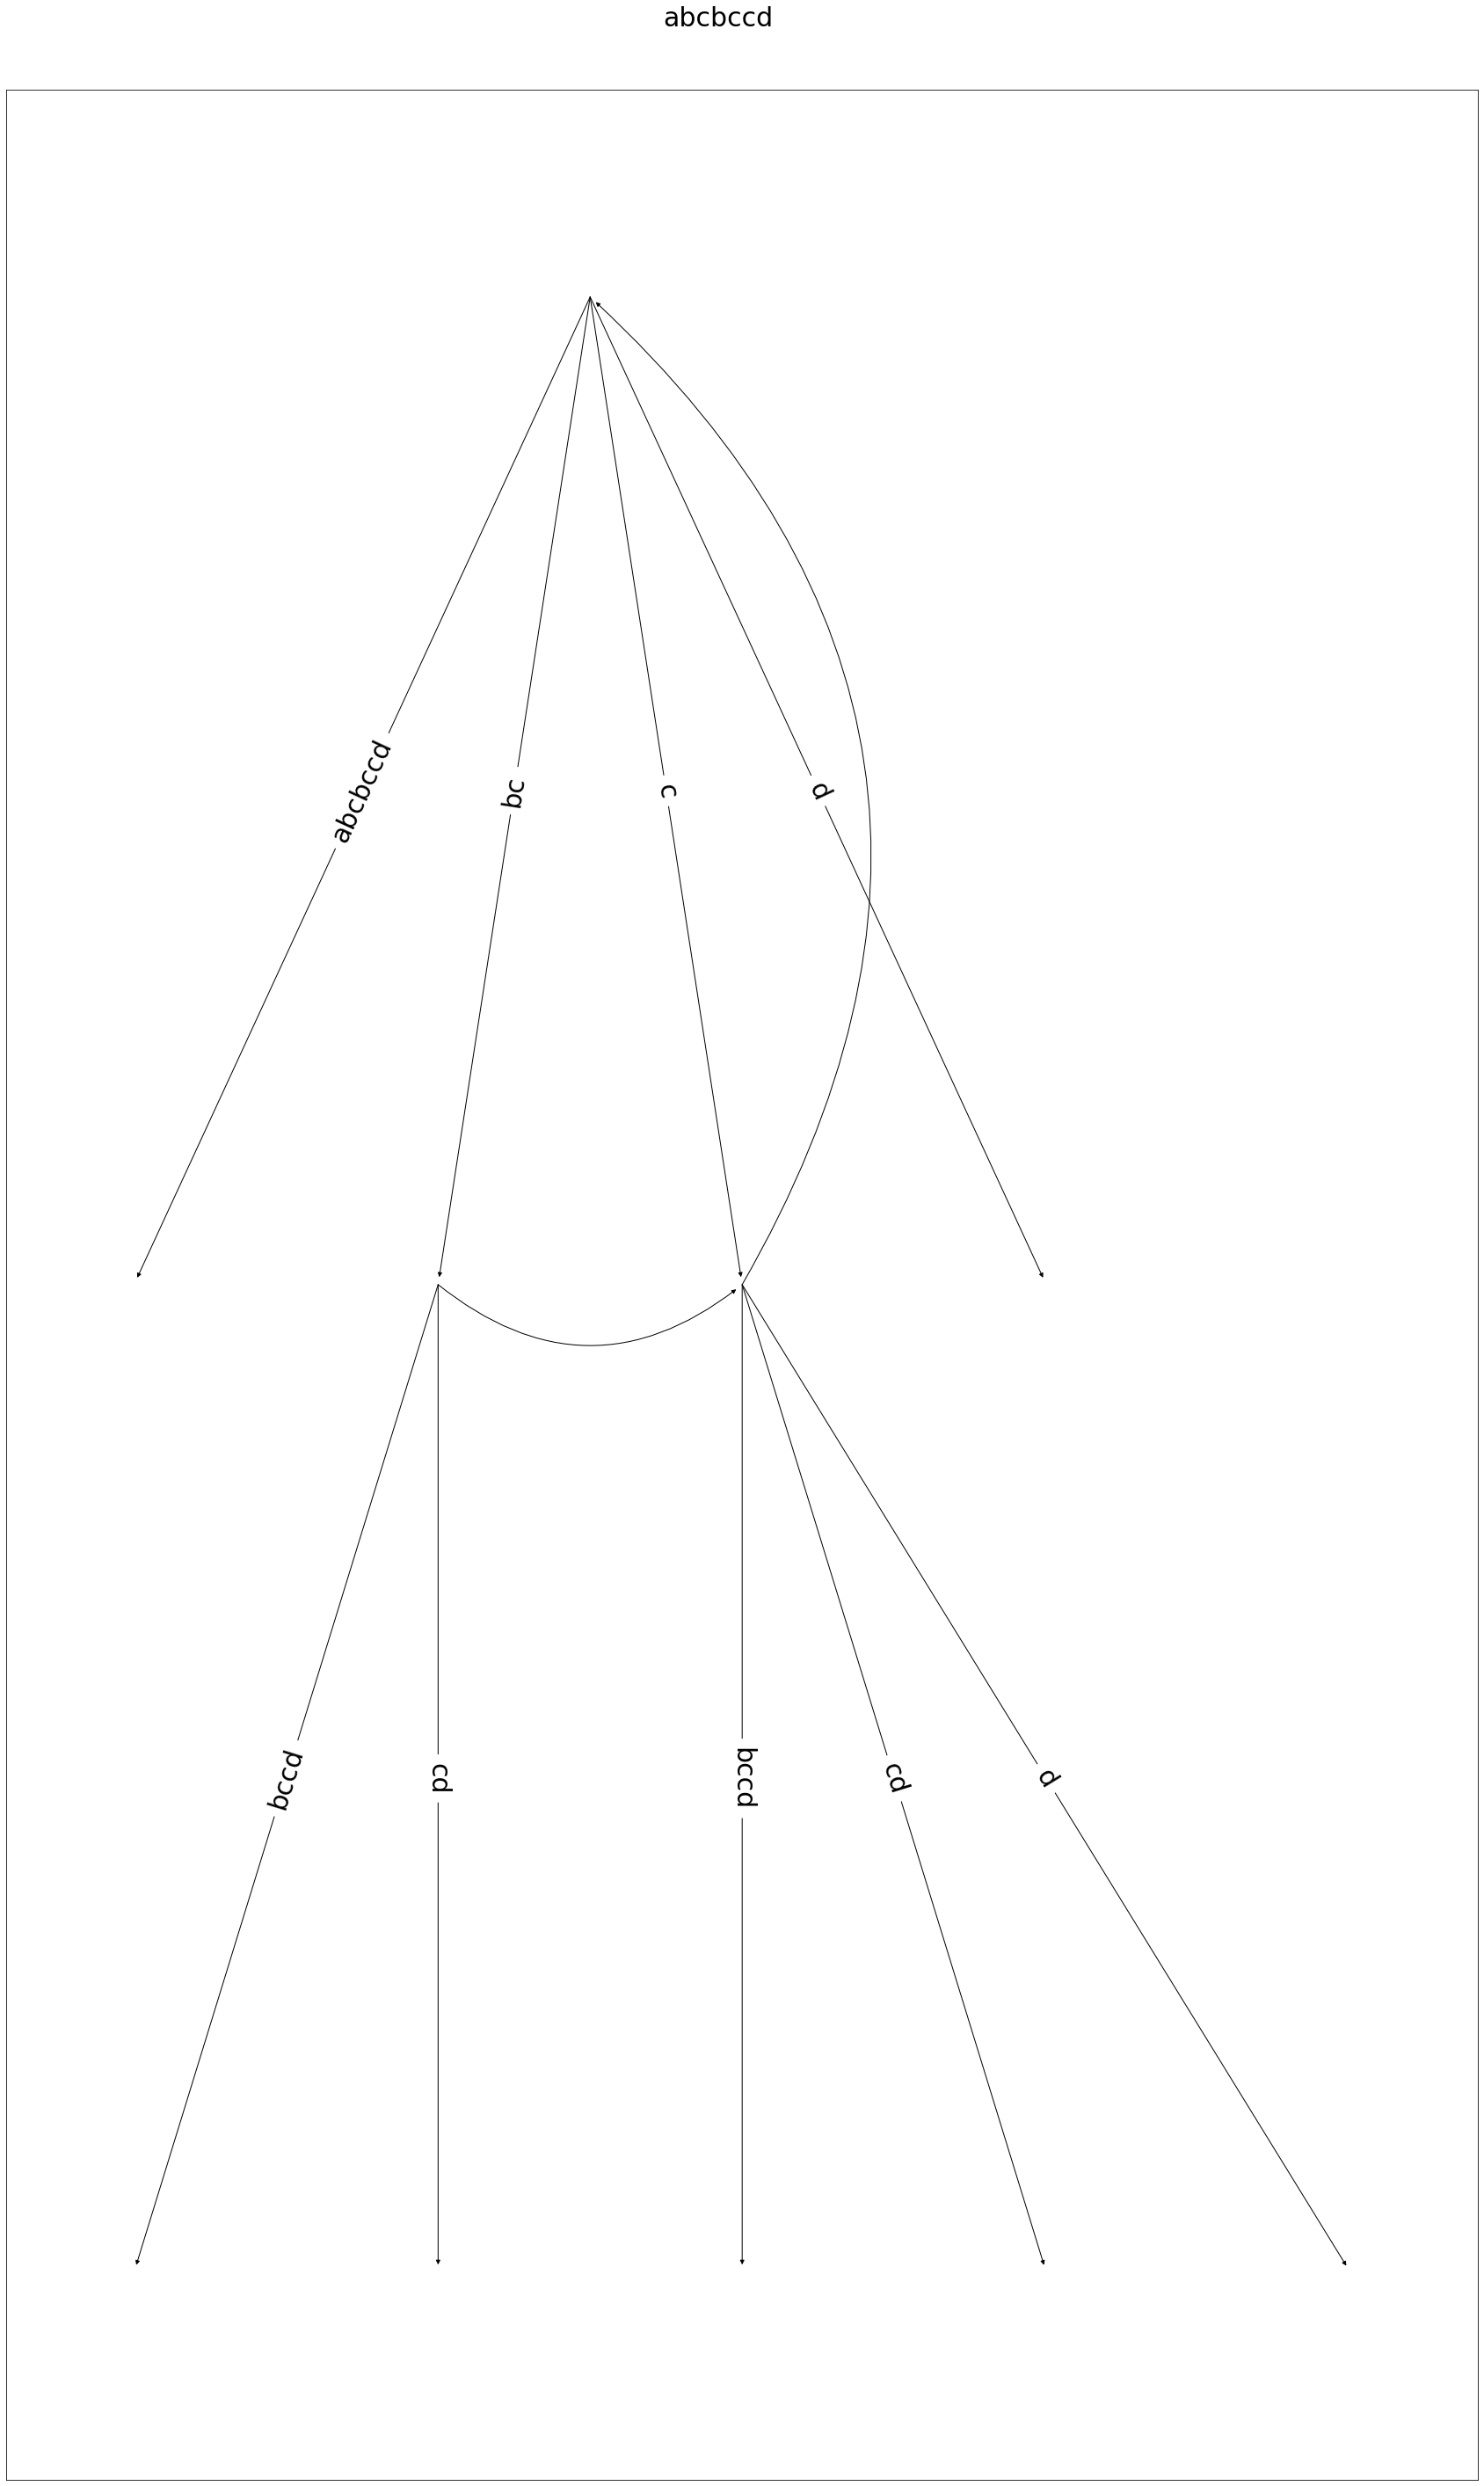

In [18]:
t1 = SuffTree(ex1)
t1.mc_creight()
draw_suff_tree(t1, show_links=True)

t2 = SuffTree(ex2)
t2.mc_creight()
draw_suff_tree(t2, show_links=True)

t3 = SuffTree(ex3)
t3.mc_creight()
draw_suff_tree(t3, show_links=True)

t4 = SuffTree(ex4)
t4.mc_creight()
draw_suff_tree(t4, show_links=True, filename="suff_example.png")

# Execution times comparassion

In [ ]:
import time

def compareTimes(text, do_trie=True, do_simple=True, do_mccreight=True):
    text = prepare_text(text)
    if do_trie:
        start = time.time()
        trie(text)
        stop = time.time()
        print(f"Trie: {stop-start}s")
    
    if do_simple:
        tr = SuffTree(text)
        start = time.time()
        tr.simple_build()
        stop = time.time()
        print(f"Simple suffix tree building: {stop-start}s")
    
    if do_mccreight:
        tr = SuffTree(text)
        start = time.time()
        tr.mc_creight()
        stop = time.time()
        print(f"McCreight: {stop-start}s")
 
    
    

In [ ]:
compareTimes(ex1)

In [ ]:
compareTimes(ex2)

In [ ]:
compareTimes(ex3)

In [ ]:
compareTimes(ex4)

In [ ]:
compareTimes(ex5[:2000])

In [ ]:
compareTimes(ex5, do_trie=False)